# Finding Ideal Location to Start Restaurant in Toronto, Canada
## Capstone Project - The Battle of Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM / Coursera

## Table of contents
* [Introduction: Business Problem and Target Audience](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem and Target Audience <a name="introduction"></a>

This project will determine the best administrative ward in the City of Toronto to set up a new restaurant, the type of cuisine to focus on, and the a  suitable pricing segment based on demographic and economic data of Toronto's wards. 

Ideal ward characteristics would be: high population density, few restaurants per person, definitive ethnic and economic characteristics of the 
residents, growing population, and a very common type of restaurant in the neighborhood which will tell us what type of food can do well in the ward.  

This report is targeted to investors looking to set up a new restaurant in Toronto but who do not yet know what area to locate in or 
what type of product to offer. Once the investor finishes reading this report, the investor will know which neighborhood, what 
type of cuisine, and what pricing to use for his/her new restaurant.

## Data <a name="data"></a>

To solve the business problem, the key features that need to be extracted from data about each ward are:
* population density of Wards
* number of food service establishments in each ward 
* the predominant ethnic demographic of each ward
* individual income level of each ward
* population growth of each ward
* most common restaurant in each ward

The following data sources were used from the City of Toronto Open Data Portal: 
(https://www.toronto.ca/city-government/data-research-maps/open-data/)
* City Wards Data: This dataset contains the name and corresponding ward number for all 25 administrative wards of the City of Toronto.
* 2018-ward-profiles-25-ward-model-geographic-areas: This dataset contains the land area size in square kilometers of each Ward. 
* Food Inspection Dataset (City of Toronto): this dataset contains the names, latitude, and longitude of every food establishment in Toronto. As a result, the data extracted from this dataset was used to determine how many food service establishments there are in each ward of Toronto and their geographic location.
* 2018-ward-profiles-2011-2016-census-25-ward-model-data: This dataset contains the following data from the 2011 and 2016 Toronto census:
    * Total Population and Ward Population: this data combined with land area data was used to calculate population density
    * Population Based on Country Ethnic Origin: this data was used to determine predominant ethnic groups of wards
    * Population Segmented by Income: individual income of each ward was obtained from this data
    * Difference between 2011 and 2016 population: population growth from 2011 to 2016 was obtained from this data

In addition to City of Toronto data, the following data sources were used:
* Google Maps: each of Toronto's 25 wards latitude and longitude was approximated by entering major intersection or landmark of each ward into Google Maps
* Foursquare API: the most commone venue of each ward was determined by exploring for venues around the center point of each ward. This information was used to get an idea of what type of restaurants were the most common in each ward. 

### First create a dataframe to store the coordinates of each ward

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Import csv file from Open Data Portal with Ward Number and Ward Name
file = # Hidden info by user
df = pd.read_csv(file)

In [3]:
df.columns

Index(['_id', 'AREA_ID', 'DATE_EFFECTIVE', 'DATE_EXPIRY', 'AREA_ATTR_ID',
       'AREA_TYPE_ID', 'PARENT_AREA_ID', 'AREA_TYPE', 'AREA_CLASS_ID',
       'AREA_CLASS', 'AREA_SHORT_CODE', 'AREA_LONG_CODE', 'AREA_NAME',
       'AREA_DESC', 'FEATURE_CODE', 'FEATURE_CODE_DESC', 'TRANS_ID_CREATE',
       'TRANS_ID_EXPIRE', 'X', 'Y', 'LONGITUDE', 'LATITUDE', 'OBJECTID',
       'Shape__Area', 'Shape__Length', 'geometry'],
      dtype='object')

#### Columns needed are:
#### AREA_NAME

In [4]:
df = df[['AREA_NAME']]

In [5]:
df

,AREA_NAME
0,Humber River-Black Creek
1,York Centre
2,Willowdale
3,University-Rosedale
4,Beaches-East York
5,Scarborough Southwest
6,Scarborough-Rouge Park
7,Scarborough North
8,Scarborough-Guildwood
9,Scarborough Centre


In [6]:
# Rename columns with useful names for data analysis
df = df.rename(columns = {'AREA_NAME':'Ward'})

In [7]:
# Make columns for latitude and longitude data entry
df['Latitude'] = ""
df['Longitude'] = ""

In [8]:
df

,Ward,Latitude,Longitude
0,Humber River-Black Creek,,
1,York Centre,,
2,Willowdale,,
3,University-Rosedale,,
4,Beaches-East York,,
5,Scarborough Southwest,,
6,Scarborough-Rouge Park,,
7,Scarborough North,,
8,Scarborough-Guildwood,,
9,Scarborough Centre,,


In [10]:
# Look up the ward data that requires latitude and longitude data on Google Maps. 
# First look at map of ward from City of Toronto Open Data Portal and approximate a center point based on intersection or landmark.
# Then find the intersection or landmark on Google maps and enter the latitude and longitude
for i, j in zip(df.index, df['Ward']):
    #print(i, j)
    df.loc[i, 'Latitude'] = input("Enter Latitude for {}".format(j))
    df.loc[i,'Longitude'] = input("Enter Longitude for {}".format(j))

Enter Latitude for Humber River-Black Creek 43.747199
Enter Longitude for Humber River-Black Creek -79.52889
Enter Latitude for York Centre 43.750962
Enter Longitude for York Centre -79.463553
Enter Latitude for Willowdale 43.776991
Enter Longitude for Willowdale -79.414824
Enter Latitude for University-Rosedale 43.673924
Enter Longitude for University-Rosedale -79.391584
Enter Latitude for Beaches-East York 43.687587
Enter Longitude for Beaches-East York -79.305159
Enter Latitude for Scarborough Southwest 43.714206
Enter Longitude for Scarborough Southwest -79.256889
Enter Latitude for Scarborough-Rouge Park 43.799067
Enter Longitude for Scarborough-Rouge Park -79.16767
Enter Latitude for Scarborough North 43.810931
Enter Longitude for Scarborough North -79.252795
Enter Latitude for Scarborough-Guildwood 43.763134
Enter Longitude for Scarborough-Guildwood -79.210516
Enter Latitude for Scarborough Centre 43.753275
Enter Longitude for Scarborough Centre -79.276266
Enter Latitude for Sca

In [12]:
ward_coord = df
ward_coord

,Ward,Latitude,Longitude
0,Humber River-Black Creek,43.747199,-79.52889
1,York Centre,43.750962,-79.463553
2,Willowdale,43.776991,-79.414824
3,University-Rosedale,43.673924,-79.391584
4,Beaches-East York,43.687587,-79.305159
5,Scarborough Southwest,43.714206,-79.256889
6,Scarborough-Rouge Park,43.799067,-79.16767
7,Scarborough North,43.810931,-79.252795
8,Scarborough-Guildwood,43.763134,-79.210516
9,Scarborough Centre,43.753275,-79.276266


In [13]:
# Save the dataframe as csv file to reference the latitude and longitude later
path = # Hidden info by user
ward_coord.to_csv(path)

### Now import dataset to add ward # and land area of each ward

In [14]:
#Import file ward_coord.csv that contains ward name, latitudes and longitudes
path = # Hidden info by user
wards = pd.read_csv(path)

In [15]:
wards.head()

,Unnamed: 0,Ward,Latitude,Longitude
0,0,Humber River-Black Creek,43.747199,-79.528890
1,1,York Centre,43.750962,-79.463553
2,2,Willowdale,43.776991,-79.414824
3,3,University-Rosedale,43.673924,-79.391584
4,4,Beaches-East York,43.687587,-79.305159


In [16]:
# Remove the unnecessary first column
wards = wards[['Ward', 'Latitude',  'Longitude']]

In [17]:
wards.head()

,Ward,Latitude,Longitude
0,Humber River-Black Creek,43.747199,-79.528890
1,York Centre,43.750962,-79.463553
2,Willowdale,43.776991,-79.414824
3,University-Rosedale,43.673924,-79.391584
4,Beaches-East York,43.687587,-79.305159


In [18]:
#Add ward numbers
path = # Hidden info by user
ward_num = pd.read_csv(path)

In [19]:
ward_num.columns

Index(['_id', 'AREA_ID', 'DATE_EFFECTIVE', 'DATE_EXPIRY', 'AREA_ATTR_ID',
       'AREA_TYPE_ID', 'PARENT_AREA_ID', 'AREA_TYPE', 'AREA_CLASS_ID',
       'AREA_CLASS', 'AREA_SHORT_CODE', 'AREA_LONG_CODE', 'AREA_NAME',
       'AREA_DESC', 'FEATURE_CODE', 'FEATURE_CODE_DESC', 'TRANS_ID_CREATE',
       'TRANS_ID_EXPIRE', 'X', 'Y', 'LONGITUDE', 'LATITUDE', 'OBJECTID',
       'Shape__Area', 'Shape__Length', 'geometry'],
      dtype='object')

In [20]:
#AREA_LONG_CODE contains the corresponding ward numbers
ward_num = ward_num[['AREA_LONG_CODE','AREA_NAME']]

In [22]:
# Insert the 'ward #' column to the dataframe
wards.insert(0, 'Ward #', ward_num.loc[:,'AREA_LONG_CODE'])

In [23]:
# Sort the wards in ascending Ward # order
wards = wards.sort_values(by = ['Ward #'], ignore_index = True)

In [24]:
wards

,Ward #,Ward,Latitude,Longitude
0,1,Etobicoke North,43.725429,-79.578757
1,2,Etobicoke Centre,43.664601,-79.550374
2,3,Etobicoke-Lakeshore,43.622806,-79.519140
3,4,Parkdale-High Park,43.650001,-79.463845
4,5,York South-Weston,43.695530,-79.489915
5,6,York Centre,43.750962,-79.463553
6,7,Humber River-Black Creek,43.747199,-79.528890
7,8,Eglinton-Lawrence,43.719360,-79.429685
8,9,Davenport,43.667810,-79.443582
9,10,Spadina-Fort York,43.643116,-79.408300


### Approximate a radius to use for each ward based on assumption that each ward is circular. In reality, the wards are different shapes, but to maintain consistency across wards, each ward's area will be assumed to be circular centered around the approximated center of each ward

    Area of circle = pie x r squared 
    Area of Ward = pie x r squared
    r squared  = Area of Ward / pie
    r = Square Root of (Area of Ward / pie)

In [25]:
# Import land area data about each ward
file = # Hidden info by user
df1 = pd.read_excel(file)
df1.head()

,Ward,Area (sq km)
0,1,48.38
1,2,37.36
2,3,40.03
3,4,15.33
4,5,24.98


In [26]:
#Rename column to match corresponding column in dataframe that we will merge with
df1 = df1.rename(columns = {'Ward':'Ward #'})

#Add each ward's area to 'wards' dataframe and rename to ward_map
area = df1['Area (sq km)']
ward_map = wards.join(area)

In [27]:
ward_map

,Ward #,Ward,Latitude,Longitude,Area (sq km)
0,1,Etobicoke North,43.725429,-79.578757,48.38
1,2,Etobicoke Centre,43.664601,-79.550374,37.36
2,3,Etobicoke-Lakeshore,43.622806,-79.519140,40.03
3,4,Parkdale-High Park,43.650001,-79.463845,15.33
4,5,York South-Weston,43.695530,-79.489915,24.98
5,6,York Centre,43.750962,-79.463553,35.37
6,7,Humber River-Black Creek,43.747199,-79.528890,30.71
7,8,Eglinton-Lawrence,43.719360,-79.429685,22.67
8,9,Davenport,43.667810,-79.443582,12.10
9,10,Spadina-Fort York,43.643116,-79.408300,18.71


### Calculate radius of each ward using assumption that each ward is circular. In reality each ward is not circular but for the purpose of this study we just need to have each circle sufficiently cover each part of city so that there no big pockets that are not covered by ward circle areas. 

In [28]:
#Import math for square root and pi functions
import math

In [29]:
#Calculate and add 'Radius' of each ward's assumed circular area starting from the center of each ward
for i in range(len(ward_map)):
    ward_map.loc[i, 'Radius (km)'] = (math.sqrt((ward_map.loc[i, 'Area (sq km)'])/math.pi))

In [31]:
ward_map.head()

,Ward #,Ward,Latitude,Longitude,Area (sq km),Radius (km)
0,1,Etobicoke North,43.725429,-79.578757,48.38,3.924262
1,2,Etobicoke Centre,43.664601,-79.550374,37.36,3.448486
2,3,Etobicoke-Lakeshore,43.622806,-79.519140,40.03,3.569586
3,4,Parkdale-High Park,43.650001,-79.463845,15.33,2.209002
4,5,York South-Weston,43.695530,-79.489915,24.98,2.819819


#### Check out how well the mapping using Folium to see how well the ward center latitudes, longitudes, radius, and areas were estimated.

In [83]:
import geocoder 

In [84]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [85]:
#Get the geographical coordinates of Toronto
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent = "toronto_explorer") #Name the user_agent toronto_explorer
location = geolocator.geocode(address)
tor_latitude = location.latitude
tor_longitude = location.longitude
print('The geographical coordinates of {} are {}, {}.'.format(address, tor_latitude, tor_longitude))

The geographical coordinates of Toronto, Ontario are 43.6534817, -79.3839347.


In [86]:
#Import map rendering library
import folium

In [87]:
#First create a map of Toronto using latitude and longitude values 
map_toronto = folium.Map(location=[tor_latitude, tor_longitude], zoom_start=10)

In [89]:
#Add markers to mark the neighborhoods defined by ward # and ward name. Plot the circles to approximate the area of ward as circular wards.
for lat, lng, wardnum, ward, radius in zip(ward_map['Latitude'], ward_map['Longitude'], ward_map['Ward #'], ward_map['Ward'], ward_map['Radius (km)']):
    label = 'Ward {}, {}'.format(wardnum, ward)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius = radius*1000,        
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity = 0.7,
        parse_html=False).add_to(map_toronto)

In [90]:
map_toronto

### Looking at the mapping the approximation of ward centers, their radius, and their areas do a good job. There are only a few small areas between wards that are not covered and the degree of overlap is acceptable to conduct Foursquare search later on at the end of code.
### Let's move on

In [32]:
# Save the dataframe as csv file to reference the latitude and longitude later
path = # Hidden info by user
ward_map.to_csv(path)

### Let's import the dataset that contains names of all the licensed food establishments in Toronto

### City of Toronto has its Dine Safe program which inspects all food establishments in the City of Toronto to make sure they meet health standards. Therefore, we can use the data from the program to determine the total number of dining establishments in Toronto and the number of establishments per ward(district). Some of the establishments are not restaurants - for example, some are nursing homes, food shelters, food manufacturers, etc. We will define “restaurant competitor” broadly since these days supermarkets and food carts can compete with restaurants so “any establishment that the general public may buy ready-to-eat food from” will be used as the definition of competitor. The key distinguishing terms in the definition are accessibility to the general public and ready-to-eat food which eliminates establishments such as nursing homes and food manufacturing plants. 

#### https://www.toronto.ca/community-people/health-wellness-care/health-programs-advice/food-safety/dinesafe/#Explore#Search 

### Calculate the number of food establishments per person in City of Toronto and each of its wards

In [37]:
#Import data from City of Toronto Dine Safe which has list of all licenced food establishments in City of Toronto
path = # Hidden info by user
restaurants_df = pd.read_excel(path)

In [39]:
restaurants_df.head()

,ID,NAME,TYPE,ADDRESS,LATITUDE,LONGITUDE,STATUS,STATUS2,DATE,SEVERITY,ACTION,CONVICTION_DATE,COURT_OUTCOME,AMOUNT_FINED
0,9008018,'K' STORE,Food Store (Convenience/Variety),99 CARLTON ST,43.66205,-79.37747,Pass,Pass,2019-03-29,NaN,NaN,NaN,NaN,NaN
1,10510325,0109 Dessert + Chocolate,Restaurant,"2190 MCNICOLL AVE, -109",43.81477,-79.29491,Pass,Pass,2019-10-25,NaN,NaN,NaN,NaN,NaN
2,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,Conditional Pass,2019-03-04,C - Crucial,Notice to Comply,NaN,NaN,NaN
3,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,Conditional Pass,2019-03-04,M - Minor,Notice to Comply,NaN,NaN,NaN
4,10500438,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,Pass,Conditional Pass,2019-03-04,S - Significant,Notice to Comply,NaN,NaN,NaN


In [40]:
#Keep only columns that are needed to determine location and type of establishment
rest_lat_lng = restaurants_df[['NAME', 'TYPE', 'ADDRESS', 'LATITUDE', 'LONGITUDE']]

print (rest_lat_lng.shape)
rest_lat_lng.head()

(62271, 5)


,NAME,TYPE,ADDRESS,LATITUDE,LONGITUDE
0,'K' STORE,Food Store (Convenience/Variety),99 CARLTON ST,43.66205,-79.37747
1,0109 Dessert + Chocolate,Restaurant,"2190 MCNICOLL AVE, -109",43.81477,-79.29491
2,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842
3,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842
4,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842


In [43]:
#Remove duplicate entries of same establishment. The database currently includes multiple inspections of the same establishment
rest_lat_lng_final = rest_lat_lng.drop_duplicates()

#Rename final dataframe with restaurant Name, Type, Address, latitude, longitude as 'rest_lat_lng_final'
print (rest_lat_lng_final.shape)
print ("There are {} food establishments in City of Toronto".format(rest_lat_lng_final.shape[0]))
rest_lat_lng_final.head()

(17694, 5)
There are 17694 food establishments in City of Toronto


,NAME,TYPE,ADDRESS,LATITUDE,LONGITUDE
0,'K' STORE,Food Store (Convenience/Variety),99 CARLTON ST,43.66205,-79.37747
1,0109 Dessert + Chocolate,Restaurant,"2190 MCNICOLL AVE, -109",43.81477,-79.29491
2,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842
18,1-SATELLITE KITCHEN,Food Take Out,1 BLUE JAYS WAY,43.64168,-79.39012
21,100% Korean,Food Take Out,4779 STEELES AVE E,43.82529,-79.29867


In [44]:
#Reset the index
rest_lat_lng_final = rest_lat_lng_final.reset_index(drop=True)

In [45]:
rest_lat_lng_final.head()

,NAME,TYPE,ADDRESS,LATITUDE,LONGITUDE
0,'K' STORE,Food Store (Convenience/Variety),99 CARLTON ST,43.66205,-79.37747
1,0109 Dessert + Chocolate,Restaurant,"2190 MCNICOLL AVE, -109",43.81477,-79.29491
2,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842
3,1-SATELLITE KITCHEN,Food Take Out,1 BLUE JAYS WAY,43.64168,-79.39012
4,100% Korean,Food Take Out,4779 STEELES AVE E,43.82529,-79.29867


### To determine what ward we should assign each food establishment to we need to determine which ward center each food establishment is closest to.
### To achieve this, we must first determine how many meters 1 degree of latitude and longitude are at Toronto's latitude using formulae explained on Wikipeida:
#### Formulae for length of degree of latitudes and longitudes from Wikipedia: https://en.wikipedia.org/wiki/Geographic_coordinate_system

### From the formula above, we can determine how many meters is 1 degree latitude and longitude.
##### Formulae to calculate meters per change in 1 degree of latitude and longitude at the latitude of Toronto:
###### m_per_deg_lat = 111132.954 - (559.822 * math.cos( 2 * latMid * math.pi/180 )) + (1.175 * math.cos( 4 * latMid * math.pi/180)) - (0.0023 * math.cos(6 * latMid * math.pi/180))
###### m_per_deg_lon = math.cos(latMid * math.pi/180) * 111321.543

In [48]:
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

In [49]:
#Get the geographical coordinates of Toronto
address = 'Toronto, Ontario'
geolocator = Nominatim(user_agent = "toronto_explorer") #Name the user_agent toronto_explorer
location = geolocator.geocode(address)
tor_latitude = location.latitude
tor_longitude = location.longitude
print('The geographical coordinates of {} are {}, {}.'.format(address, tor_latitude, tor_longitude))

The geographical coordinates of Toronto, Ontario are 43.6534817, -79.3839347.


In [50]:
#Latitude of Toronto
latMid = tor_latitude

#Use formulae above to calculate meters per change per 1 degree of latitude and longitude at the latitude of Toronto
m_per_deg_lat = 111132.954 - (559.822 * math.cos( 2 * latMid * math.pi/180 )) + (1.175 * math.cos( 4 * latMid * math.pi/180)) - (0.0023 * math.cos(6 * latMid * math.pi/180))
m_per_deg_lon = math.cos(latMid * math.pi/180) * 111321.543

print ("Toronto's latitude is {} and longitude is {}".format(tor_latitude, tor_longitude))
print ("1 degree of latitude = {} meters".format(m_per_deg_lat))
print ("1 degree of longitude = {} meters".format(m_per_deg_lon))                                                                                

Toronto's latitude is 43.6534817 and longitude is -79.3839347
1 degree of latitude = 111105.48124585701 meters
1 degree of longitude = 80544.23480269285 meters


In [51]:
# Import file with ward coordinates
path = # Hidden info by user
ward_map = pd.read_csv(path)

In [52]:
ward_map = ward_map.drop(columns = 'Unnamed: 0')

In [53]:
ward_map

,Ward #,Ward,Latitude,Longitude,Area (sq km),Radius (km)
0,1,Etobicoke North,43.725429,-79.578757,48.38,3.924262
1,2,Etobicoke Centre,43.664601,-79.550374,37.36,3.448486
2,3,Etobicoke-Lakeshore,43.622806,-79.519140,40.03,3.569586
3,4,Parkdale-High Park,43.650001,-79.463845,15.33,2.209002
4,5,York South-Weston,43.695530,-79.489915,24.98,2.819819
5,6,York Centre,43.750962,-79.463553,35.37,3.355387
6,7,Humber River-Black Creek,43.747199,-79.528890,30.71,3.126547
7,8,Eglinton-Lawrence,43.719360,-79.429685,22.67,2.686277
8,9,Davenport,43.667810,-79.443582,12.10,1.962537
9,10,Spadina-Fort York,43.643116,-79.408300,18.71,2.440405


In [54]:
# Create new columns for Ward #, Ward, and Distance From Ward Center. Set Distance From Ward Center as 1000000 default value.
# Set loop below to check distance of establishment from Ward Center. If distance is less than current value in Distance From Ward Center, replace it with the
# new value. The final value will be the shortest distance and the restaurant will belong to that ward.
rest_lat_lng_final['Ward #'] = ""
rest_lat_lng_final['Ward'] = ""
rest_lat_lng_final['Distance From Ward Center'] = 1000000

In [55]:
print(rest_lat_lng_final.shape)
rest_lat_lng_final.head()

(17694, 8)


,NAME,TYPE,ADDRESS,LATITUDE,LONGITUDE,Ward #,Ward,Distance From Ward Center
0,'K' STORE,Food Store (Convenience/Variety),99 CARLTON ST,43.66205,-79.37747,,,1000000
1,0109 Dessert + Chocolate,Restaurant,"2190 MCNICOLL AVE, -109",43.81477,-79.29491,,,1000000
2,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,,,1000000
3,1-SATELLITE KITCHEN,Food Take Out,1 BLUE JAYS WAY,43.64168,-79.39012,,,1000000
4,100% Korean,Food Take Out,4779 STEELES AVE E,43.82529,-79.29867,,,1000000


In [56]:
# Determine which ward each restaurant should belong to
# Run loop to to compare distance of each restaurant to center of each ward
# The restaurant will belong to the ward whose center has the shortest distance from the coordinates of the restaurant 

#Recall Latitude of Toronto defined above when we brought in the coordinates of Toronto using Geolocator
latMid = tor_latitude

#Loop through each restaurant and loop through each ward to calculate the restaurant's distance to each ward's center. 
#Define the Ward # and Ward Name as the one whose center is closest to the restaurant and keep the one with shortest Distance from the Ward Center
for i in range(len(rest_lat_lng_final)):  
    for j in range(ward_map.shape[0]):
        lat_difference = abs((rest_lat_lng_final.loc[i, 'LATITUDE']) - (ward_map.loc[j, 'Latitude']))
        long_difference = abs((rest_lat_lng_final.loc[i, 'LONGITUDE']) - (ward_map.loc[j, 'Longitude']))

        #Formulae to calculate meters change per 1 degree of latitude and longitude in Toronto
        m_per_deg_lat = 111132.954 - (559.822 * math.cos( 2 * latMid * math.pi/180 )) + (1.175 * math.cos( 4 * latMid * math.pi/180)) - (0.0023 * math.cos(6 * latMid * math.pi/180))
        m_per_deg_lon = math.cos(latMid * math.pi/180) * 111321.543

        latitude_from_ward_center = lat_difference * m_per_deg_lat
        longitude_from_ward_center = long_difference * m_per_deg_lon
        
        distance_from_ward_center = math.sqrt(((latitude_from_ward_center**2) + (longitude_from_ward_center**2)))
        
        if distance_from_ward_center < rest_lat_lng_final.loc[i,'Distance From Ward Center']:
            rest_lat_lng_final.loc[i, 'Distance From Ward Center'] = distance_from_ward_center
            rest_lat_lng_final.loc[i, 'Ward #'] = ward_map.loc[j, 'Ward #']
            rest_lat_lng_final.loc[i, 'Ward'] = ward_map.loc[j, 'Ward']

In [57]:
print("Size of dataframe is {}".format(rest_lat_lng_final.shape))
rest_lat_lng_final.head()

Size of dataframe is (17694, 8)


,NAME,TYPE,ADDRESS,LATITUDE,LONGITUDE,Ward #,Ward,Distance From Ward Center
0,'K' STORE,Food Store (Convenience/Variety),99 CARLTON ST,43.66205,-79.37747,13,Toronto Centre,1149.027197
1,0109 Dessert + Chocolate,Restaurant,"2190 MCNICOLL AVE, -109",43.81477,-79.29491,22,Scarborough-Agincourt,2123.744603
2,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,9,Davenport,2199.543443
3,1-SATELLITE KITCHEN,Food Take Out,1 BLUE JAYS WAY,43.64168,-79.39012,10,Spadina-Fort York,1472.960579
4,100% Korean,Food Take Out,4779 STEELES AVE E,43.82529,-79.29867,22,Scarborough-Agincourt,3165.897330


In [58]:
#Rename dataframe as Toronto_food_establishments for easier referencing
toronto_food_establishments = rest_lat_lng_final

In [59]:
# Save dataframe of all food establishments in City of Toronto to csv for future referencing
path = # Hidden info by user
toronto_food_establishments.to_csv(path)

In [60]:
#Check for NaN cells in dataframe
toronto_food_establishments.isnull().sum().sum()

0

In [61]:
#Count number of distinct values for 'Type' of food establishment
toronto_food_establishments['TYPE'].nunique()

58

In [62]:
#Check out what type of food establishments are in the dataframe
toronto_food_establishments['TYPE'].unique()

array(['Food Store (Convenience/Variety)', 'Restaurant', 'Food Take Out',
       'Food Caterer', 'Hot Dog Cart', 'Retirement Homes(Licensed)',
       'Boarding / Lodging Home - Kitchen', 'Bakery', 'Banquet Facility',
       'Cocktail Bar / Beverage Room', 'Cafeteria - Public Access',
       'Supermarket', 'Mobile Food Preparation Premises', 'Private Club',
       'Bake Shop', 'Food Bank', 'Community Kitchen (Meal Program)',
       'Serving Kitchen', 'Butcher Shop', 'Food Depot',
       'Child Care - Food Preparation', 'Food Court Vendor',
       'Food Processing Plant', 'Child Care - Catered',
       'Cafeteria - Private Access', 'Fish Shop',
       'Ice Cream / Yogurt Vendors', 'Student Nutrition Site',
       'Secondary School Food Services',
       'Other Educational Facility Food Services',
       'Institutional Food Services', 'Commissary',
       'Nursing Home / Home for the Aged',
       'Refreshment Stand (Stationary)',
       'Elementary School Food Services', 'Bed & Breakfast

In [63]:
# Filter array to have only the types that would be competitors to a restaurant. 
# A competitor will be defined as “any establishment that the general public may buy ready-to-eat food from”. 
restaurant_like_businesses = ['Food Store (Convenience/Variety)', 'Restaurant', 'Food Take Out',
       'Food Caterer', 'Hot Dog Cart', 'Bakery', 'Cocktail Bar / Beverage Room', 'Cafeteria - Public Access',
       'Supermarket', 'Mobile Food Preparation Premises', 'Private Club',
       'Bake Shop', 'Food Court Vendor', 'Refreshment Stand (Stationary)',
       'Bed & Breakfast', 'College / University Food Services', 'Food Cart', 'Flea Market']

In [64]:
#Filter dataframe to contain only establishments considered to be restaurant competitors
test_df = toronto_food_establishments.loc[toronto_food_establishments['TYPE'].isin(restaurant_like_businesses)]

In [65]:
print("There are {} restaurant-like establishements in Toronto".format(test_df.shape[0]))
test_df.head()

There are 14569 restaurant-like establishements in Toronto


,NAME,TYPE,ADDRESS,LATITUDE,LONGITUDE,Ward #,Ward,Distance From Ward Center
0,'K' STORE,Food Store (Convenience/Variety),99 CARLTON ST,43.66205,-79.37747,13,Toronto Centre,1149.027197
1,0109 Dessert + Chocolate,Restaurant,"2190 MCNICOLL AVE, -109",43.81477,-79.29491,22,Scarborough-Agincourt,2123.744603
2,1 PLUS 1 PIZZA,Food Take Out,361 OAKWOOD AVE,43.68725,-79.43842,9,Davenport,2199.543443
3,1-SATELLITE KITCHEN,Food Take Out,1 BLUE JAYS WAY,43.64168,-79.39012,10,Spadina-Fort York,1472.960579
4,100% Korean,Food Take Out,4779 STEELES AVE E,43.82529,-79.29867,22,Scarborough-Agincourt,3165.897330


In [66]:
#Create dataframe to contain number of restaurant-like establishments per ward. They will be called "Food Service Businessses"
rest_per_ward = test_df.groupby('Ward #').count()
rest_per_ward = rest_per_ward[['NAME']]
rest_per_ward = rest_per_ward.rename(columns={'NAME':'# of Food Service Businesses'})

In [67]:
#Import dataset containing data about population of Toronto. This will be used to calculate population density of Toronto wards.
path = # Hidden info by user
ward_pop = pd.read_csv(path)
ward_pop = ward_pop.drop(columns = ['Unnamed: 0'])

In [68]:
ward_pop.head()

,Ward #,Total - Age,0 to 4 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,...,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 years and over,Median age,Area (sq km),Pop_Density
0,Toronto,2731570,136000,135025,127110,145525,194750,232945,224575,196310,...,153865,130540,93605,76160,60635,40800,25200,38.9,642.78,4249.618843
1,Ward 1,118040,6815,7500,7400,8380,9545,8625,7950,7450,...,6100,5270,3830,3030,2455,1475,705,36.5,48.38,2439.851178
2,Ward 2,118020,5230,5905,6080,6840,7335,6530,6470,6375,...,7960,6505,4805,4385,4225,3100,2010,45.2,37.36,3158.993576
3,Ward 3,129080,6370,5630,4870,5370,7690,10535,11230,10310,...,8075,6585,4620,3595,2835,1900,1315,41.1,40.03,3224.581564
4,Ward 4,108805,5770,5540,4685,4450,5590,9860,11065,9675,...,5945,4960,3205,2305,1755,1315,995,38.4,15.33,7097.521200


In [69]:
rest_per_ward

,# of Food Service Businesses
Ward #,
1,441
2,253
3,673
4,529
5,466
6,400
7,429
8,447
9,756


In [70]:
#Sum up the total number of restaurants from each ward
x = rest_per_ward.sum()

#Create new row for total number of restaurants in Toronto
rest_per_ward.loc['Toronto'] = x

In [71]:
#Put total number of restaurants in Toronto row as the first row in the dataframe
rest_per_ward = rest_per_ward.reindex(['Toronto', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [72]:
rest_per_ward

,# of Food Service Businesses
Ward #,
Toronto,14569
1,441
2,253
3,673
4,529
5,466
6,400
7,429
8,447


In [73]:
#Now add columns for population in Toronto and each ward ("Total - Age") and population density ("Pop_Density") and land area ('Area (sq km)')
land_area = ward_pop['Area (sq km)']
population = ward_pop['Total - Age']
population_density = ward_pop['Pop_Density']

rest_per_ward = rest_per_ward.join(land_area)
rest_per_ward = rest_per_ward.join(population)
rest_per_ward = rest_per_ward.join(population_density)

rest_per_ward.loc['Toronto', 'Area (sq km)'] = ward_pop.loc[0, 'Area (sq km)']

rest_per_ward.loc['Toronto', 'Pop_Density'] = ward_pop.loc[0, 'Pop_Density']

rest_per_ward.loc['Toronto', 'Total - Age'] = ward_pop.loc[0, 'Total - Age']

In [74]:
columns = list(rest_per_ward)
columns

['# of Food Service Businesses', 'Area (sq km)', 'Total - Age', 'Pop_Density']

In [75]:
# Reorder columns and rename Pop_Density to 'People/sq km' to clearly represent column
columns = ['Area (sq km)', '# of Food Service Businesses', 'Total - Age', 'Pop_Density']
rest_per_ward[columns]
rest_per_ward = rest_per_ward.rename(columns = {'Pop_Density' : 'People/sq km'})

In [76]:
rest_per_ward['Total - Age'] = rest_per_ward['Total - Age'].astype(int)

In [77]:
rest_per_ward

,# of Food Service Businesses,Area (sq km),Total - Age,People/sq km
Ward #,,,,
Toronto,14569,642.78,2731570,4249.618843
1,441,48.38,118040,2439.851178
2,253,37.36,118020,3158.993576
3,673,40.03,129080,3224.581564
4,529,15.33,108805,7097.521200
5,466,24.98,116685,4671.136910
6,400,35.37,104320,2949.392140
7,429,30.71,108035,3517.909476
8,447,22.67,114395,5046.096162


### Examine dataframe to determine '# of Food Service Businesses' per person and '# of Food Service Businesses' per person per square km (Pop_Density)

In [78]:
# List the rows in the dataframe
list(rest_per_ward.index)

['Toronto',
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

In [79]:
# Set variable as list of rows in dataframe to use in loop below
rest_per_ward_row = ['Toronto', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

In [80]:
#Add new columns for restaurants per 1000 people, restaurants per sq km, number of customers per restaurant in every sq km
for i in rest_per_ward_row:
    rest_per_1000 = (rest_per_ward.loc[i, '# of Food Service Businesses'] / rest_per_ward.loc[i, 'Total - Age']) * 1000
    rest_per_sqkm = (rest_per_ward.loc[i, '# of Food Service Businesses'] / rest_per_ward.loc[i, 'Area (sq km)'])
    Customers_Rest_Sq_km = rest_per_ward.loc[i, 'People/sq km']/rest_per_sqkm
    
    rest_per_ward.loc[i, 'rest_per_1000'] = rest_per_1000
    rest_per_ward.loc[i, 'rest_per_sqkm'] = rest_per_sqkm
    rest_per_ward.loc[i, '# Customers/Rest/Sq km'] = Customers_Rest_Sq_km

In [81]:
rest_per_ward

,# of Food Service Businesses,Area (sq km),Total - Age,People/sq km,rest_per_1000,rest_per_sqkm,# Customers/Rest/Sq km
Ward #,,,,,,,
Toronto,14569,642.78,2731570,4249.618843,5.333563,22.665609,187.491935
1,441,48.38,118040,2439.851178,3.736022,9.115337,267.664399
2,253,37.36,118020,3158.993576,2.143704,6.771949,466.482213
3,673,40.03,129080,3224.581564,5.213821,16.812391,191.797920
4,529,15.33,108805,7097.521200,4.861909,34.507502,205.680529
5,466,24.98,116685,4671.136910,3.993658,18.654924,250.396996
6,400,35.37,104320,2949.392140,3.834356,11.309019,260.800000
7,429,30.71,108035,3517.909476,3.970935,13.969391,251.829837
8,447,22.67,114395,5046.096162,3.907513,19.717689,255.917226


In [82]:
# Save the dataframe rest_per_ward as csv file to reference later
path = # Hidden info by user
rest_per_ward.to_csv(path)

### Let's import the remaining datasets

### Ward Ethnicity Dataset

In [91]:
# Import file with data with population of each ethnic group per ward
path = # Hidden info by user
ward_ethnicity_df = pd.read_csv(path)

In [92]:
#Drop unnecessary first column
ward_ethnicity_df = ward_ethnicity_df.drop(columns = 'Unnamed: 0')

In [93]:
ward_ethnicity_df

,Ward #,Total - Ethnic origin for the population in private households - 25% sample data,North American Aboriginal origins,First Nations (North American Indian),Inuit,Métis,Other North American origins,Acadian,American,Canadian,...,Oceania origins,Australian,New Zealander,Pacific Islands origins,Fijian,Hawaiian,Maori,Samoan,"Polynesian, n.o.s.","Pacific Islands origins, n.i.e."
0,Toronto,2691665,35630,27610,520,8465,345705,2315,27470,323175,...,5790,3705,1230,1020,465,125,140,65,75,220
1,Ward 1,116960,680,565,10,115,9620,40,430,9250,...,60,25,10,35,20,10,0,0,10,0
2,Ward 2,116055,1210,890,30,335,14840,35,965,14070,...,220,165,20,35,20,15,0,0,0,0
3,Ward 3,127525,2235,1695,35,510,21575,155,1575,20265,...,305,180,35,100,65,10,10,0,0,30
4,Ward 4,106440,2580,1995,55,635,18805,220,2040,17145,...,435,340,85,10,0,0,0,0,0,10
5,Ward 5,115130,1320,1095,15,270,10600,40,590,10045,...,105,55,0,45,25,0,0,15,0,15
6,Ward 6,103760,730,615,10,120,9610,25,825,8890,...,95,65,10,20,10,10,0,10,0,0
7,Ward 7,107730,745,595,0,160,8290,35,355,7975,...,35,15,0,20,15,0,0,0,0,0
8,Ward 8,112920,905,665,10,250,18665,155,2715,16595,...,295,225,55,25,0,0,0,10,0,20
9,Ward 9,107395,2025,1615,10,490,15030,180,1425,13730,...,380,240,135,40,20,10,0,0,0,10


### Ward Income Dataset

In [94]:
# Import data on 2016 ward income
path = # Hidden info by user
ward2018_profiles_income_df = pd.read_excel(path)

In [95]:
ward2018_profiles_income_df = ward2018_profiles_income_df.rename(columns = {'Unnamed: 0':'Income Bracket'})

In [96]:
ward2018_profiles_income_df

,Income Bracket,Toronto,Ward 1,Ward 2,Ward 3,Ward 4,Ward 5,Ward 6,Ward 7,Ward 8,...,Ward 16,Ward 17,Ward 18,Ward 19,Ward 20,Ward 21,Ward 22,Ward 23,Ward 24,Ward 25
0,Total - Total income groups in 2015 for the po...,2294785,95290,98785,110720,90625,95660,88040,87560,92465,...,78080,94405,103860,89250,89655,92275,89925,82745,83080,85060
1,Without total income,107560,5845,4110,3750,3245,5175,4235,5415,4495,...,4710,5155,5895,3925,5070,5265,4580,4885,5030,4795
2,With total income,2187225,89445,94675,106965,87380,90485,83805,82145,87970,...,73370,89255,97960,85320,84585,87010,85350,77855,78050,80265
3,"Under $10,000 (including loss)",388570,18485,13910,14865,12630,15900,14110,16870,13180,...,13480,19580,24205,13575,15920,17205,18565,17805,16070,14670
4,"$10,000 to $19,999",411160,20100,14750,16495,14210,20005,17505,19855,13510,...,14045,16730,17520,14775,17805,18455,20460,19395,17405,15585
5,"$20,000 to $29,999",290580,14395,11945,12630,10670,14965,13575,14250,11120,...,10355,11430,10875,10135,12130,13775,13030,11950,11910,10450
6,"$30,000 to $39,999",221505,11015,9280,10600,8150,11305,9915,10440,8665,...,8070,8440,8395,7990,9245,10755,8995,8420,8800,8560
7,"$40,000 to $49,999",188475,8635,8445,9860,7585,8695,7865,7885,7225,...,6530,7265,6930,6780,7720,8370,6815,6310,7255,7805
8,"$50,000 to $59,999",144180,5675,7065,8010,6075,6200,5360,4940,5415,...,5050,5425,5870,5735,5460,5900,4945,4360,4885,6240
9,"$60,000 to $69,999",114915,3700,6165,6965,5305,4355,3875,2875,4405,...,3850,4555,4715,4665,4300,4065,3595,3095,3495,4520


### 2011 Ward Profiles Population

In [97]:
# Import data on 2011 ward populations
path = # Hidden info by user
ward2011_profiles_population_df = pd.read_excel(path)

In [98]:
ward2011_profiles_population_df.columns = ward2011_profiles_population_df.loc[0]

In [99]:
ward2011_profiles_population_df = ward2011_profiles_population_df.drop([0])

In [100]:
ward2011_profiles_population_df

,NaN,Toronto,Ward 1,Ward 2,Ward 3,Ward 4,Ward 5,Ward 6,Ward 7,Ward 8,...,Ward 16,Ward 17,Ward 18,Ward 19,Ward 20,Ward 21,Ward 22,Ward 23,Ward 24,Ward 25
1,Total population by age groups,2615060,117605,114905,115435,105105,116610,100275,108200,113150,...,93005,103080,109675,107085,106730,108825,104500,101080,101910,102645
2,0 to 4 years,140510,7710,5220,5815,6055,7440,5690,7545,6925,...,5450,4655,4840,6885,6315,6540,4955,5350,6535,5375
3,5 to 9 years,128065,7770,5660,4875,4985,6695,5005,7015,6960,...,4785,4675,3730,6080,5855,6105,4650,5300,6270,5730
4,10 to 14 years,132290,8170,6420,4885,4505,6980,5445,7045,6950,...,5210,5060,4030,5515,6280,6165,5160,5870,6460,6765
5,15 to 19 years,150040,8745,7370,5600,4555,7665,6035,7745,7200,...,5585,6270,5490,5560,6980,6830,6600,6910,7190,7760
6,20 to 24 years,183470,8675,7045,6510,5920,7820,6250,9000,6615,...,5795,7110,9075,5865,6670,7345,7305,7490,7505,7810
7,25 to 29 years,211850,8325,6015,7880,9255,8365,6685,8265,6640,...,6270,7260,10890,6510,6660,7265,7130,7405,6855,6900
8,30 to 34 years,201165,7800,5405,9130,10045,8045,7185,7350,7350,...,6415,6450,9920,8000,6800,7055,5670,6045,6575,5835
9,35 to 39 years,190405,7895,6170,8980,9670,7670,6910,7000,7955,...,6475,7220,8270,9080,7145,7310,6405,6295,6660,5935
10,40 to 44 years,197400,8635,7930,8960,9150,8550,7435,7595,8620,...,7180,8210,7965,9455,8200,7845,7715,7160,7225,6745


### 2016 Ward Profiles Population

In [101]:
# Import data on 2016 ward populations
path = # Hidden info by user
ward2018_profiles_population_df = pd.read_excel(path)

In [102]:
ward2018_profiles_population_df.columns = ward2018_profiles_population_df.loc[0]

In [103]:
ward2018_profiles_population_df = ward2018_profiles_population_df.drop([0])

In [104]:
ward2018_profiles_population_df

,NaN,Toronto,Ward 1,Ward 2,Ward 3,Ward 4,Ward 5,Ward 6,Ward 7,Ward 8,...,Ward 16,Ward 17,Ward 18,Ward 19,Ward 20,Ward 21,Ward 22,Ward 23,Ward 24,Ward 25
1,Total - Age,2731570,118040,118020,129080,108805,116685,104320,108035,114395,...,94580,110080,118800,109465,110280,112605,105540,98800,102390,102275
2,0 to 4 years,136000,6815,5230,6370,5770,6530,5510,6575,6300,...,5015,4715,5065,6895,6160,5905,4880,4950,5860,4890
3,5 to 9 years,135025,7500,5905,5630,5540,6695,5195,6895,7025,...,5185,5140,4420,6550,6330,6250,4875,5125,6385,5565
4,10 to 14 years,127110,7400,6080,4870,4685,6350,5045,6615,7155,...,4990,4810,4095,5745,6185,6120,4545,4835,5915,5935
5,15 to 19 years,145525,8380,6840,5370,4450,7185,6100,7450,7340,...,5530,5815,6195,5380,6745,6975,5805,6180,6685,7110
6,20 to 24 years,194750,9545,7335,7690,5590,7995,6995,8985,7155,...,5915,8165,9910,5760,6990,8390,6985,7265,7965,7665
7,25 to 29 years,232945,8625,6530,10535,9860,8030,6790,7985,6650,...,6185,9135,11865,6370,6640,7700,7590,7450,7190,6790
8,30 to 34 years,224575,7950,6470,11230,11065,8160,7370,7280,7035,...,6375,8140,10895,8150,7105,7495,6550,6350,6560,6115
9,35 to 39 years,196310,7450,6375,10310,9675,7900,7750,6840,7760,...,6550,7215,8865,8955,7265,7090,5560,5465,6385,5690
10,40 to 44 years,182395,7350,6945,9260,8635,7480,7135,6515,7840,...,6300,7295,7870,8755,7515,7210,6140,5800,6320,6050


### All the datasets have been imported and put into dataframe. Let's move on to analyzing the data.

## Methodology <a name="methodology"></a>

##### First, k Means Clustering will be performed to the rest_per_ward dataframe above to find clusters related to 'People/sq km' and '# Customers/Rest/Sq km' features. Candidate wards will be chosen based on the clustering to find wards that stand out from their cluster either with higher 'People/sq km' or higher '# Customers/Rest/Sq km' compared to other wards in the same cluster. 
##### Second, the ethnic composition of the candidate wards will be looked at to determine the predominant ethnic groups to determine if there is an ethnic type of cuisine that would likely have many customers. 
##### Third, the income of the candidate wards will be analyzed to determine how expensive a new restaurant should be. 
##### Fourth, the population growth of the candidate wards will be looked at to know which wards are showing growth. 
##### Lastly, we will perform Foursquare API venue search to find most common venues of the candidate wards to see if there is a type of restaurant that is most common to the ward. A certain type of restaurant among most common venues would give clues as to what type of restaurant should do well in the area. 

## Analysis <a name="analysis"></a>

Analysis of data will follow the methodology and order outlined above

In [105]:
# Import file rest_per_ward
path = # Hidden info by user
rest_per_ward_df = pd.read_csv(path)

In [106]:
rest_per_ward_df.head()

,Ward #,# of Food Service Businesses,Area (sq km),Total - Age,People/sq km,rest_per_1000,rest_per_sqkm,# Customers/Rest/Sq km
0,Toronto,14569,642.78,2731570,4249.618843,5.333563,22.665609,187.491935
1,1,441,48.38,118040,2439.851178,3.736022,9.115337,267.664399
2,2,253,37.36,118020,3158.993576,2.143704,6.771949,466.482213
3,3,673,40.03,129080,3224.581564,5.213821,16.812391,191.797920
4,4,529,15.33,108805,7097.521200,4.861909,34.507502,205.680529


In [107]:
# Normalize the data so that we can compare the population density ('People/sq km') and the number of potential customers per restaurant ('# Customers/Rest/Sq km')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(rest_per_ward_df.loc[:, '# of Food Service Businesses' : '# Customers/Rest/Sq km'])

In [108]:
# Get a list of the columns in our original database of restaurants per ward
cols = list(rest_per_ward_df.columns[:])
cols

['Ward #',
 '# of Food Service Businesses',
 'Area (sq km)',
 'Total - Age',
 'People/sq km',
 'rest_per_1000',
 'rest_per_sqkm',
 '# Customers/Rest/Sq km']

In [109]:
# Create datafrane of normalized data
data_scaled_df = pd.DataFrame(data_scaled)

In [110]:
#Insert ward numbers
data_scaled_df.insert(0, "Ward #", rest_per_ward_df['Ward #'])

In [111]:
# Put the matching columns in
data_scaled_df.columns = cols

In [112]:
data_scaled_df.head()

,Ward #,# of Food Service Businesses,Area (sq km),Total - Age,People/sq km,rest_per_1000,rest_per_sqkm,# Customers/Rest/Sq km
0,Toronto,1.000000,1.000000,1.000000,0.149089,0.234413,0.064387,0.224557
1,1,0.019502,0.066759,0.008897,0.034718,0.135058,0.020118,0.362183
2,2,0.006454,0.049457,0.008889,0.080165,0.036028,0.012462,0.703477
3,3,0.035603,0.053649,0.013083,0.084310,0.226966,0.045265,0.231949
4,4,0.025609,0.014868,0.005394,0.329066,0.205080,0.103075,0.255780


In [113]:
cols = list(data_scaled_df.columns[1:])

In [114]:
cols

['# of Food Service Businesses',
 'Area (sq km)',
 'Total - Age',
 'People/sq km',
 'rest_per_1000',
 'rest_per_sqkm',
 '# Customers/Rest/Sq km']

In [115]:
import matplotlib.pyplot as plt

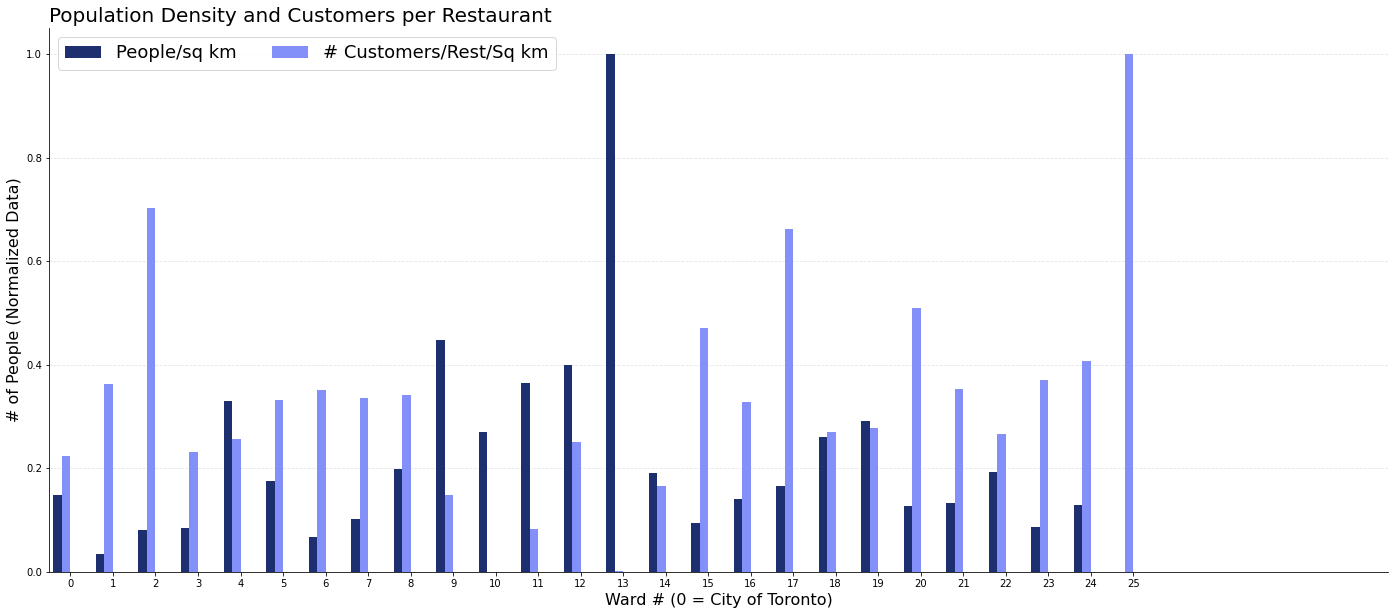

In [116]:
# define figure
fig, ax = plt.subplots(1, figsize=(24, 10))
# numerical x
x = np.arange(0, len(data_scaled_df.index))
# plot bars
plt.bar(x - 0.3, data_scaled_df['People/sq km'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, data_scaled_df['# Customers/Rest/Sq km'], width = 0.2, color = '#8390FA')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('# of People (Normalized Data)', fontsize = 16)
plt.xlabel('Ward # (0 = City of Toronto)', fontsize = 16)
plt.xticks(x, data_scaled_df.index)
plt.xlim(-0.5, 31)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Population Density and Customers per Restaurant', loc ='left', fontsize = 20)
plt.legend(['People/sq km', '# Customers/Rest/Sq km'], loc='upper left', ncol = 4, fontsize = 18)

#plt.show()

plt.savefig('density.png', bbox_inches='tight')

In [117]:
# Sort the values by population density 'People/sq km' to see the order of most dense to least dense
rest_per_ward_df.sort_values(by = 'People/sq km', ascending = False)

,Ward #,# of Food Service Businesses,Area (sq km),Total - Age,People/sq km,rest_per_1000,rest_per_sqkm,# Customers/Rest/Sq km
13,13,1811,5.86,103805,17714.163823,17.446173,309.044369,57.319161
9,9,756,12.10,108470,8964.462810,6.969669,62.479339,143.478836
12,12,531,13.12,107900,8224.085366,4.921223,40.472561,203.201507
11,11,993,13.60,104310,7669.852941,9.519701,73.014706,105.045317
4,4,529,15.33,108805,7097.521200,4.861909,34.507502,205.680529
19,19,500,16.81,109465,6511.897680,4.567670,29.744200,218.930000
10,10,2038,18.71,115510,6173.703902,17.643494,108.925708,56.678116
18,18,554,19.77,118800,6009.104704,4.663300,28.022256,214.440433
8,8,447,22.67,114395,5046.096162,3.907513,19.717689,255.917226
22,22,498,21.40,105540,4931.775701,4.718590,23.271028,211.927711


Text(0, 0.5, '# Cust/Rest/Sq km')

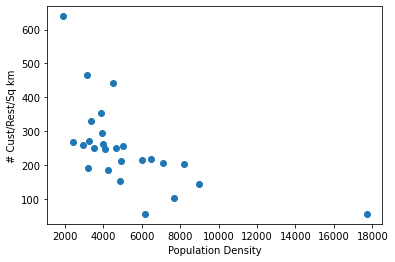

In [118]:
# Look at the population density and # Customers/Rest/Sq km. We want to find relatively high population density and relatively high # Customers/Rest/Sq km
import matplotlib.pyplot as plt
y = rest_per_ward_df['# Customers/Rest/Sq km']
x = rest_per_ward_df['People/sq km']
plt.scatter(x, y)

#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 7))(np.unique(x)))

plt.xlabel("Population Density")
plt.ylabel("# Cust/Rest/Sq km")

### There are two extreme wards:
#### Ward 13 has highest 'People/sq km' and lowest '# Customers/Rest/Sq km'
#### Ward 25 has lowest 'People/sq km' and highest '# Customers/Rest/Sq km'

## Run k Means Clustering to cluster the wards based on population density and # of Customers per Restaurant per Square Km. k = 3.

In [119]:
from sklearn.cluster import KMeans

In [120]:
# Use 3 clusters which is optimal. The elbow test is below.
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

In [121]:
wards_clustering = rest_per_ward_df[['People/sq km', '# Customers/Rest/Sq km']]

In [122]:
wards_clustering = wards_clustering.drop(index = [0])

In [123]:
wards_clustering_array = np.array(wards_clustering)

In [124]:
k_means.fit(wards_clustering_array)

KMeans(n_clusters=3, n_init=12)

In [125]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0])

In [126]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 3753.24485737,   303.06309849],
       [17714.16382253,    57.31916068],
       [ 7235.80408613,   163.92210544]])

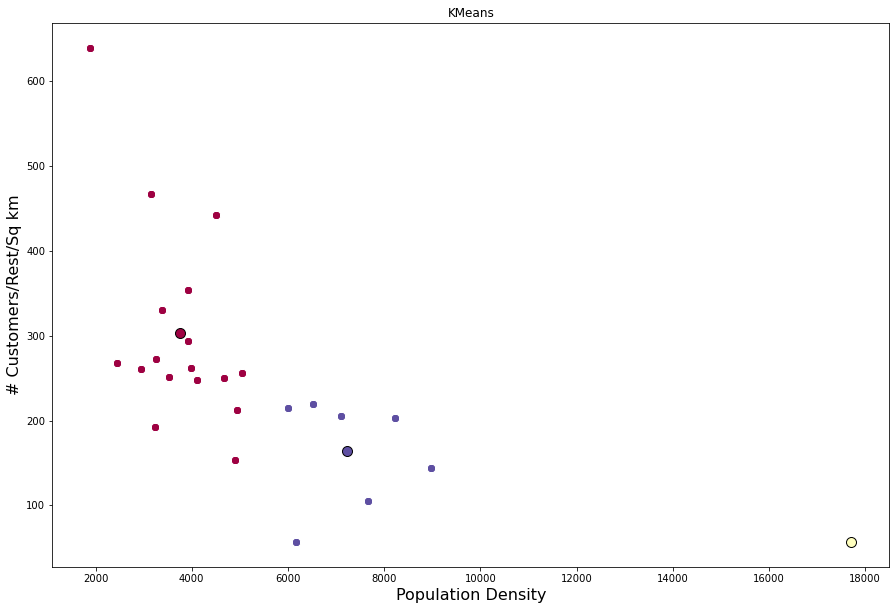

In [127]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(15, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(wards_clustering_array[my_members, 0], wards_clustering_array[my_members, 1], 'w', markerfacecolor=col, marker="8", markersize=8)
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=10)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
#ax.set_xticks(())

# remove y-axis ticks
#ax.set_yticks(())

#Labels
plt.xlabel("Population Density", size = 16)
plt.ylabel("# Customers/Rest/Sq km", size = 16)

plt.savefig('kmeans1.png', bbox_inches='tight')
# show the plot
plt.show()



#### It can be seen that two extremes are the yellow cluster with only one point the red point in the top left corner. 
#### The two wards seem to be extreme outliers since the yellow point has the highest population density and the lowest # of Customers per Restaurant per Sq km. By contrast, the red point in the top left has the lowest population density and the highest # of Customers per Restaurant per Sq km. 

#### Elbow method used to find optimal k

In [128]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(wards_clustering_array)
    distortions.append(kmeanModel.inertia_)

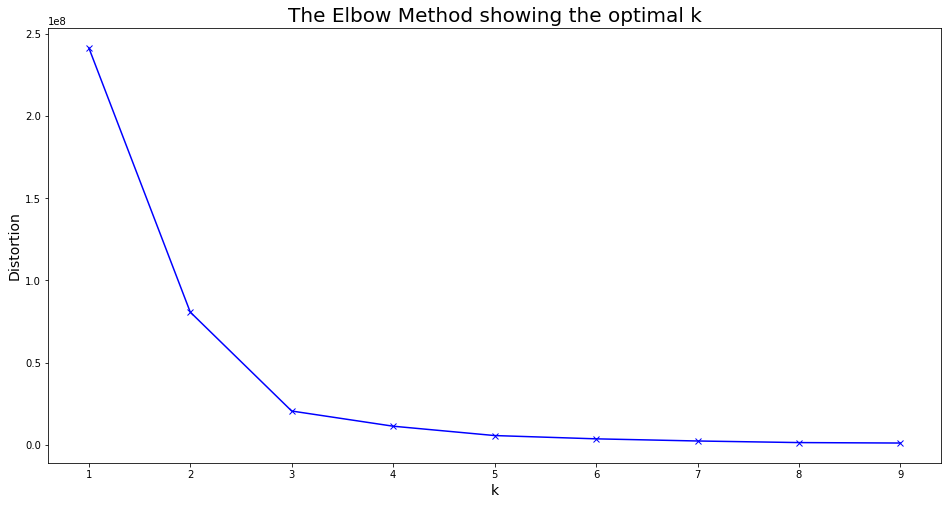

In [129]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k', size = 14)
plt.ylabel('Distortion', size = 14)
plt.title('The Elbow Method showing the optimal k', size = 20)
plt.savefig('kmeans1_elbow.png', bbox_inches='tight')
plt.show()

### Let's run k Means again without the two outliers (bottom right point (Ward 13) and top left point (Ward 25)) which seem to be extreme points and therefore may be ruled out as choices. As well, let's exclude City of Toronto which is not a ward but an average of the whole city. k = 4.

In [130]:
# Use 4 clusters which is optimal. The elbow test is below.
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [131]:
#Create dataframe for the clustered data without outliers Ward 13, Ward 25, and City of Toronto data
wards_less_outliers = rest_per_ward_df.drop(index = [0,13,25])
wards_less_outliers = wards_less_outliers.reset_index(drop=True)

In [132]:
wards_less_outliers

,Ward #,# of Food Service Businesses,Area (sq km),Total - Age,People/sq km,rest_per_1000,rest_per_sqkm,# Customers/Rest/Sq km
0,1,441,48.38,118040,2439.851178,3.736022,9.115337,267.664399
1,2,253,37.36,118020,3158.993576,2.143704,6.771949,466.482213
2,3,673,40.03,129080,3224.581564,5.213821,16.812391,191.797920
3,4,529,15.33,108805,7097.521200,4.861909,34.507502,205.680529
4,5,466,24.98,116685,4671.136910,3.993658,18.654924,250.396996
5,6,400,35.37,104320,2949.392140,3.834356,11.309019,260.800000
6,7,429,30.71,108035,3517.909476,3.970935,13.969391,251.829837
7,8,447,22.67,114395,5046.096162,3.907513,19.717689,255.917226
8,9,756,12.10,108470,8964.462810,6.969669,62.479339,143.478836
9,10,2038,18.71,115510,6173.703902,17.643494,108.925708,56.678116


In [135]:
k_means.fit(wards_less_outliers_array)

KMeans(n_clusters=4, n_init=12)

In [136]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 0, 1, 3, 0, 0, 3, 2, 1, 2, 2, 3, 0, 3, 3, 1, 1, 3, 3, 3, 0,
       3])

In [137]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[3131.3750792 ,  291.63258529],
       [6448.05687149,  173.93226958],
       [8286.13370565,  150.57521993],
       [4443.89515883,  274.60286971]])

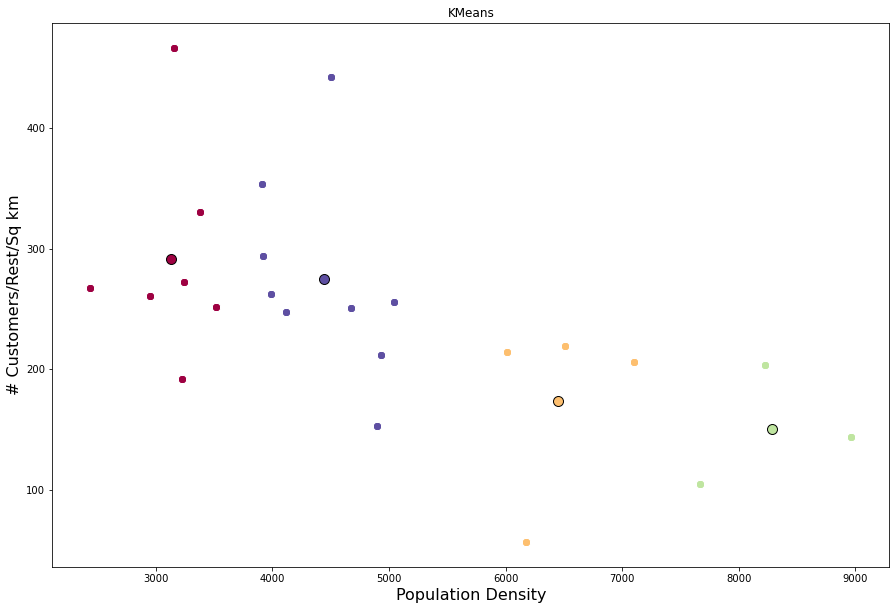

In [138]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(15, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(wards_less_outliers_array[my_members, 0], wards_less_outliers_array[my_members, 1], 'w', markerfacecolor=col, marker="8",markersize=8)
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=10)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
#ax.set_xticks(())

# remove y-axis ticks
#ax.set_yticks(())

#Labels
plt.xlabel("Population Density", size = 16)
plt.ylabel("# Customers/Rest/Sq km", size = 16)

plt.savefig('kmeans2.png', bbox_inches='tight')

# show the plot
plt.show()

#### Elbow method is shown below

#### Use elbow method to find optimal k

In [139]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(wards_less_outliers_array)
    distortions.append(kmeanModel.inertia_)

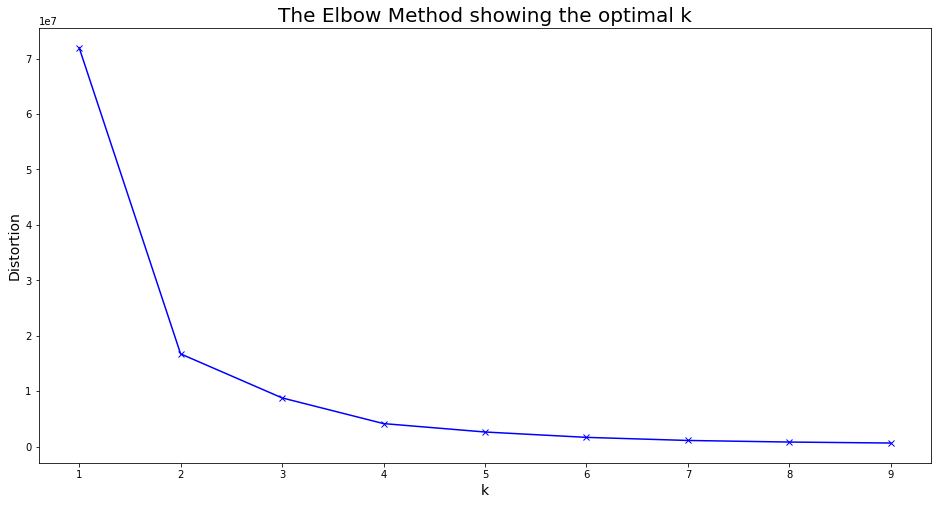

In [140]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k', size = 14)
plt.ylabel('Distortion', size = 14)
plt.title('The Elbow Method showing the optimal k',size = 20)
plt.savefig('kmeans2_elbow.png', bbox_inches='tight')
plt.show()

#### From k Means clusters without including the wards that are outliers which are Ward 17 (very high density and very low # customers per restaurant) and Ward 25 (very low population density and very high # customers per restaurant) there are 4 clusters which appear to do a good job of representing ward clusters. Wards that are noticeably positioned higher relative to other wards of the same cluster are of interest since this would indicate that the ward has high # of Customers per Restaurant per Sq km relative to other wards with similar population density. We will add these cluster labels to our new dataframe that excludes the outlier wards and investigate the wards with high # of Customers per restaurant.

In [141]:
# Add clustering labels to dataframe without outliers
wards_less_outliers.insert(1, 'Cluster Labels', k_means_labels)

In [142]:
wards_less_outliers

,Ward #,Cluster Labels,# of Food Service Businesses,Area (sq km),Total - Age,People/sq km,rest_per_1000,rest_per_sqkm,# Customers/Rest/Sq km
0,1,0,441,48.38,118040,2439.851178,3.736022,9.115337,267.664399
1,2,0,253,37.36,118020,3158.993576,2.143704,6.771949,466.482213
2,3,0,673,40.03,129080,3224.581564,5.213821,16.812391,191.797920
3,4,1,529,15.33,108805,7097.521200,4.861909,34.507502,205.680529
4,5,3,466,24.98,116685,4671.136910,3.993658,18.654924,250.396996
5,6,0,400,35.37,104320,2949.392140,3.834356,11.309019,260.800000
6,7,0,429,30.71,108035,3517.909476,3.970935,13.969391,251.829837
7,8,3,447,22.67,114395,5046.096162,3.907513,19.717689,255.917226
8,9,2,756,12.10,108470,8964.462810,6.969669,62.479339,143.478836
9,10,1,2038,18.71,115510,6173.703902,17.643494,108.925708,56.678116


#### From the four clusters, cluster 1 and 2 have 2 wards each that have high '# Customers/Rest/Sq km' relative to other wards in their respective cluster. 
#### Those wards are:
#### Ward 2
#### Ward 15
#### Ward 17
#### Ward 20
#### We will investigate these wards as our candidate wards as the ideal location to set up a new restaurant.

#### First, we will look at the ethnicity of the ward to see if there is a clearly dominant ethnic group. It is better to have a dominant ethnic group since a restaurant serving food of the dominant ethnic group will have more potential customers in that neighborhood. 

#### Second, we will also look at income level of the ward to determine what price point a restaurant in the neighborhood could target.

#### Third, we will look at population growth of the candidate wards to determine which wards have a positive growth trend.

#### Lastly, we will use Foursquare API to look at the common venues of the wards to determine if there is a type of ethnic restaurant that is most common. An ethnic restaurant that is among the most common venues would point to evidence that there is demand for such a type of ethnic cuisine. Since we are only investigating wards with a high # customers per restaurant ratio, we can assume that their is not oversupply of any type of ethnic restaurant even if it appears among the most common venues.

In [143]:
#Create dataframe only containing the wards of interest
ward_candidates = wards_less_outliers[wards_less_outliers['Ward #'].isin(['2', '15', '17', '20'])]

In [144]:
ward_candidates = ward_candidates.reset_index(drop = True)

In [145]:
ward_candidates

,Ward #,Cluster Labels,# of Food Service Businesses,Area (sq km),Total - Age,People/sq km,rest_per_1000,rest_per_sqkm,# Customers/Rest/Sq km
0,2,0,253,37.36,118020,3158.993576,2.143704,6.771949,466.482213
1,15,0,310,30.30,102510,3383.168317,3.024095,10.231023,330.677419
2,17,3,249,24.43,110080,4505.935325,2.261991,10.192386,442.088353
3,20,3,312,28.20,110280,3910.638298,2.829162,11.063830,353.461538


## Let's investigate ethnicity of the Candidate Wards

In [146]:
# Slice the ethnicity dataframe to include only candidate wards
ward_ethnicity_candidate_wards = ward_ethnicity_df[ward_ethnicity_df["Ward #"].isin(['Ward 2', 'Ward 15', 'Ward 17', 'Ward 20'])]

In [147]:
ward_ethnicity_candidate_wards

,Ward #,Total - Ethnic origin for the population in private households - 25% sample data,North American Aboriginal origins,First Nations (North American Indian),Inuit,Métis,Other North American origins,Acadian,American,Canadian,...,Oceania origins,Australian,New Zealander,Pacific Islands origins,Fijian,Hawaiian,Maori,Samoan,"Polynesian, n.o.s.","Pacific Islands origins, n.i.e."
2,Ward 2,116055,1210,890,30,335,14840,35,965,14070,...,220,165,20,35,20,15,0,0,0,0
15,Ward 15,101795,1115,845,60,275,16395,130,1520,15355,...,365,240,80,50,25,0,15,0,0,15
17,Ward 17,109055,570,465,10,120,6870,15,490,6460,...,155,50,60,45,10,10,10,0,15,10
20,Ward 20,108290,2445,1840,30,625,18130,75,700,17585,...,185,100,40,45,15,0,25,0,0,10


In [148]:
# Transpose so that the columns match other dataframes columns we created
temp = ward_ethnicity_candidate_wards.T

In [149]:
temp = temp.reset_index()
temp.loc[temp['index'] == 'Ward #', 'index'] = ''
#temp = temp.columns = temp.loc[0]

In [150]:
temp.columns = temp.loc[0]
temp = temp.drop([0])
temp = temp.reset_index(drop = True)

In [151]:
temp = temp.set_index('')

In [152]:
temp.head()

,Ward 2,Ward 15,Ward 17,Ward 20
,,,,
Total - Ethnic origin for the population in private households - 25% sample data,116055,101795,109055,108290
North American Aboriginal origins,1210,1115,570,2445
First Nations (North American Indian),890,845,465,1840
Inuit,30,60,10,30
Métis,335,275,120,625


In [153]:
# Dataframe with Ward 2 top ethnicities
ward2_ethnicity = temp.loc['North American Aboriginal origins':,:].sort_values(by = ['Ward 2'], ascending = False)

In [154]:
# Dataframe with Ward 15 top ethnicities
ward15_ethnicity = temp.loc['North American Aboriginal origins':,:].sort_values(by = ['Ward 15'], ascending = False)

In [155]:
# Dataframe with Ward 17 top ethnicities
ward17_ethnicity = temp.loc['North American Aboriginal origins':,:].sort_values(by = ['Ward 17'], ascending = False)

In [156]:
# Dataframe with Ward 20 top ethnicities
ward20_ethnicity = temp.loc['North American Aboriginal origins':,:].sort_values(by = ['Ward 20'], ascending = False)

In [157]:
ward2_ethnicity.head()

,Ward 2,Ward 15,Ward 17,Ward 20
,,,,
European origins,83380,56625,31495,44820
Southern European origins,36075,11995,10080,12715
British Isles origins,29050,33455,11390,27860
Eastern European origins,23260,14665,9965,6275
Asian origins,21780,40015,72240,46295


### 'origins' is too general to tell us enough information about ethnicity to set up a restaurant. Let's eliminate all ethnicities listed with 'origins'

In [158]:
# Create a list of rows with 'origins' in the ethnicity name.
origin_list_2 = []
origin_list_15 = []
origin_list_17 = []
origin_list_20 = []

for i in ward2_ethnicity.index:
    if i.find('origins') != -1:
        origin_list_2.append(i) 

for i in ward15_ethnicity.index:
    if i.find('origins') != -1:
        origin_list_15.append(i) 

for i in ward17_ethnicity.index:
    if i.find('origins') != -1:
        origin_list_17.append(i) 
        
for i in ward20_ethnicity.index:
    if i.find('origins') != -1:
        origin_list_20.append(i)

In [159]:
# Check out the rows with 'origins'
origin_list_2

['European origins',
 'Southern European origins',
 'British Isles origins',
 'Eastern European origins',
 'Asian origins',
 'Other North American origins',
 'East and Southeast Asian origins',
 'Western European origins (except French origins)',
 'South Asian origins',
 'French origins',
 'African origins',
 'Latin, Central and South American origins',
 'Caribbean origins',
 'West Central Asian and Middle Eastern origins',
 'Southern and East African origins',
 'British Isles origins, n.i.e.',
 'Northern European origins (except British Isles origins)',
 'North American Aboriginal origins',
 'Other African origins',
 'Central and West African origins',
 'Other African origins, n.i.e.',
 'Other European origins',
 'South Asian origins, n.i.e.',
 'North African origins',
 'Oceania origins',
 'Latin, Central and South American origins, n.i.e.',
 'Northern European origins, n.i.e.',
 'Eastern European origins, n.i.e.',
 'Other European origins, n.i.e.',
 'Caribbean origins, n.i.e.',
 'Oth

#### The rows with 'origins' are too general to decide on an ethnic type of cuisine. For example, Asian cuisine can consist of Chinese, Japanese, Korean cuisine which is too difficult to have a restaurant that can do all 3 cuisines well. It is better to eliminate rows with 'origins'.

In [160]:
# Check the number of rows with 'origins' to make sure we are eliminating the same number of rows from each dataframe
print(len(origin_list_2))
print(len(origin_list_15))
print(len(origin_list_17))
print(len(origin_list_20))

42
42
42
42


In [161]:
#Check how many rows there are before dropping rows with 'origins'
print(ward2_ethnicity.shape)
print(ward15_ethnicity.shape)
print(ward17_ethnicity.shape)
print(ward20_ethnicity.shape)

(278, 4)
(278, 4)
(278, 4)
(278, 4)


In [162]:
# Drop the rows with 'origins' from the dataframe
ward2_ethnicity = ward2_ethnicity.drop(origin_list_2)
ward15_ethnicity = ward15_ethnicity.drop(origin_list_15)
ward17_ethnicity = ward17_ethnicity.drop(origin_list_17)
ward20_ethnicity = ward20_ethnicity.drop(origin_list_20)

# Check out the new dataframes with only the specific ethnicities and make sure the shape has the number of rows from origin_list dropped
print(ward2_ethnicity.shape)
print(ward15_ethnicity.shape)
print(ward17_ethnicity.shape)
print(ward20_ethnicity.shape)

(236, 4)
(236, 4)
(236, 4)
(236, 4)


## Let's check out each ward's top 5 ethnicities

In [163]:
# Check out wards sorted for top ethnicities in Ward 2
ward2_ethnicity.head()

,Ward 2,Ward 15,Ward 17,Ward 20
,,,,
Italian,17545,5105,3170,4440
English,16575,19520,6475,15440
Canadian,14070,15355,6460,17585
Irish,12590,14465,4585,12485
Scottish,12040,15210,4755,11835


In [164]:
# Check out wards sorted for top ethnicities in Ward 15
ward15_ethnicity.head()

,Ward 2,Ward 15,Ward 17,Ward 20
,,,,
English,16575,19520,6475,15440
Canadian,14070,15355,6460,17585
Scottish,12040,15210,4755,11835
Irish,12590,14465,4585,12485
Chinese,4225,11415,35345,7800


In [165]:
# Check out wards sorted for top ethnicities in Ward 17
ward17_ethnicity.head()

,Ward 2,Ward 15,Ward 17,Ward 20
,,,,
Chinese,4225,11415,35345,7800
East Indian,4695,7030,7975,8845
Iranian,665,3085,7940,620
English,16575,19520,6475,15440
Canadian,14070,15355,6460,17585


In [166]:
# Check out wards sorted for top ethnicities in Ward 20
ward20_ethnicity.head()

,Ward 2,Ward 15,Ward 17,Ward 20
,,,,
Canadian,14070,15355,6460,17585
English,16575,19520,6475,15440
Irish,12590,14465,4585,12485
Scottish,12040,15210,4755,11835
Filipino,3170,3335,5670,10320


#### Let's see the % of the total ward population for the top 5 ethnicities of each ward

In [167]:
# In Ward 2, let's see the % of the total ward population for the top 5 ethnicities 
ward2_ethnicity_pct = ward2_ethnicity.loc[:,'Ward 2':'Ward 2'].head()
for i in ward2_ethnicity_pct.index:
    ward2_ethnicity_pct.loc[i,'% of Ward Pop'] = ward2_ethnicity.loc[i, 'Ward 2']/ward_ethnicity_candidate_wards.loc[2, 
                                                                'Total - Ethnic origin for the population in private households - 25% sample data']
                                                                                                                        
# In Ward 15, let's see the % of the total ward population for the top 5 ethnicities 
ward15_ethnicity_pct = ward15_ethnicity.loc[:,'Ward 15':'Ward 15'].head()
for i in ward15_ethnicity_pct.index:
    ward15_ethnicity_pct.loc[i,'% of Ward Pop'] = ward15_ethnicity.loc[i, 'Ward 15']/ward_ethnicity_candidate_wards.loc[15, 
                                                                'Total - Ethnic origin for the population in private households - 25% sample data']

# In Ward 17, let's see the % of the total ward population for the top 5 ethnicities 
ward17_ethnicity_pct = ward17_ethnicity.loc[:,'Ward 17':'Ward 17'].head()
for i in ward17_ethnicity_pct.index:
    ward17_ethnicity_pct.loc[i,'% of Ward Pop'] = ward17_ethnicity.loc[i, 'Ward 17']/ward_ethnicity_candidate_wards.loc[17, 
                                                                'Total - Ethnic origin for the population in private households - 25% sample data']

# In Ward 20, let's see the % of the total ward population for the top 5 ethnicities 
ward20_ethnicity_pct = ward20_ethnicity.loc[:,'Ward 20':'Ward 20'].head()
for i in ward20_ethnicity_pct.index:
    ward20_ethnicity_pct.loc[i,'% of Ward Pop'] = ward20_ethnicity.loc[i, 'Ward 20']/ward_ethnicity_candidate_wards.loc[20, 
                                                                'Total - Ethnic origin for the population in private households - 25% sample data']

In [168]:
# Edit the ward ethnicity tables so that it shows the population and percent
# Ward 2 ethnicities by population and %
ward2pct = (ward2_ethnicity_pct['% of Ward Pop'] * 100).round(2)
ward2_ethnicity_pct['% of Ward Pop'] = ward2pct
ward2_ethnicity_pct = ward2_ethnicity_pct.rename(columns = {'Ward 2': 'Ward 2 Pop'})

# Ward 15 ethnicities by population and %
ward15pct = (ward15_ethnicity_pct['% of Ward Pop'] * 100).round(2)
ward15_ethnicity_pct['% of Ward Pop'] = ward15pct
ward15_ethnicity_pct = ward15_ethnicity_pct.rename(columns = {'Ward 15': 'Ward 15 Pop'})

# Ward 17 ethnicities by population and %
ward17pct = (ward17_ethnicity_pct['% of Ward Pop'] * 100).round(2)
ward17_ethnicity_pct['% of Ward Pop'] = ward17pct
ward17_ethnicity_pct = ward17_ethnicity_pct.rename(columns = {'Ward 17': 'Ward 17 Pop'})

# Ward 20 ethnicities by population and %
ward20pct = (ward20_ethnicity_pct['% of Ward Pop'] * 100).round(2)
ward20_ethnicity_pct['% of Ward Pop'] = ward20pct
ward20_ethnicity_pct = ward20_ethnicity_pct.rename(columns = {'Ward 20': 'Ward 20 Pop'})

In [169]:
# Add in 'Other' row for Ward 2 that means all other ethnicities not in top 5
other_pop = ward_ethnicity_df.loc[2, 'Total - Ethnic origin for the population in private households - 25% sample data'] - ward2_ethnicity_pct['Ward 2 Pop'].sum()
other_pop_pct = (other_pop/ward_ethnicity_df.loc[2, 'Total - Ethnic origin for the population in private households - 25% sample data']) * 100
other_append_list = [other_pop, other_pop_pct]
other_append_df = pd.DataFrame(other_append_list)
other_append_df = other_append_df.T
other_append_df = other_append_df.rename(index = {0:'Other'}, columns = {0:'Ward 2 Pop', 1:'% of Ward Pop'})
ward2_ethnicity_pct = ward2_ethnicity_pct.append(other_append_df)

In [170]:
# let's see Ward 2 ethnicities
ward2_ethnicity_pct

,Ward 2 Pop,% of Ward Pop
Italian,17545,15.120000
English,16575,14.280000
Canadian,14070,12.120000
Irish,12590,10.850000
Scottish,12040,10.370000
Other,43235,37.253888


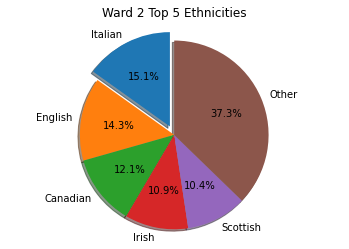

In [171]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ward2_ethnicity_pct.index
sizes = list(ward2_ethnicity_pct['% of Ward Pop'])
explode = (0.1, 0, 0, 0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Ward 2 Top 5 Ethnicities')

plt.savefig('ward2_ethnicities.png', bbox_inches='tight')

plt.show()

In [172]:
# Add in 'Other' row for Ward 15 that means all other ethnicities not in top 5
other_pop = ward_ethnicity_df.loc[15, 'Total - Ethnic origin for the population in private households - 25% sample data'] - ward15_ethnicity_pct['Ward 15 Pop'].sum()
other_pop_pct = (other_pop/ward_ethnicity_df.loc[15, 'Total - Ethnic origin for the population in private households - 25% sample data']) * 100
other_append_list = [other_pop, other_pop_pct]
other_append_df = pd.DataFrame(other_append_list)
other_append_df = other_append_df.T
other_append_df = other_append_df.rename(index = {0:'Other'}, columns = {0:'Ward 15 Pop', 1:'% of Ward Pop'})
ward15_ethnicity_pct = ward15_ethnicity_pct.append(other_append_df)

In [173]:
# let's see Ward 15 ethnicities
ward15_ethnicity_pct

,Ward 15 Pop,% of Ward Pop
English,19520,19.180000
Canadian,15355,15.080000
Scottish,15210,14.940000
Irish,14465,14.210000
Chinese,11415,11.210000
Other,25830,25.374527


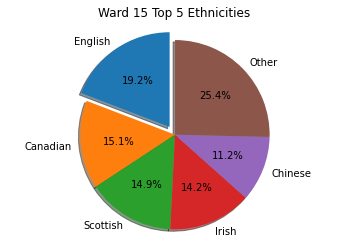

In [174]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ward15_ethnicity_pct.index
sizes = list(ward15_ethnicity_pct['% of Ward Pop'])
explode = (0.1, 0, 0, 0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Ward 15 Top 5 Ethnicities')

plt.savefig('ward15_ethnicities.png', bbox_inches='tight')

plt.show()

In [175]:
# Add in 'Other' row for Ward 17 that means all other ethnicities not in top 5
other_pop = ward_ethnicity_df.loc[17, 'Total - Ethnic origin for the population in private households - 25% sample data'] - ward17_ethnicity_pct['Ward 17 Pop'].sum()
other_pop_pct = (other_pop/ward_ethnicity_df.loc[17, 'Total - Ethnic origin for the population in private households - 25% sample data']) * 100
other_append_list = [other_pop, other_pop_pct]
other_append_df = pd.DataFrame(other_append_list)
other_append_df = other_append_df.T
other_append_df = other_append_df.rename(index = {0:'Other'}, columns = {0:'Ward 17 Pop', 1:'% of Ward Pop'})
ward17_ethnicity_pct = ward17_ethnicity_pct.append(other_append_df)

In [176]:
# let's see Ward 17 ethnicities
ward17_ethnicity_pct

,Ward 17 Pop,% of Ward Pop
Chinese,35345,32.410000
East Indian,7975,7.310000
Iranian,7940,7.280000
English,6475,5.940000
Canadian,6460,5.920000
Other,44860,41.135207


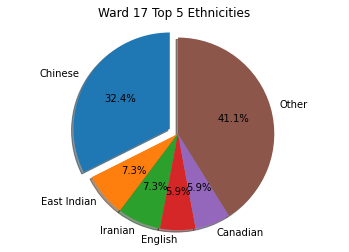

In [177]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ward17_ethnicity_pct.index
sizes = list(ward17_ethnicity_pct['% of Ward Pop'])
explode = (0.1, 0, 0, 0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Ward 17 Top 5 Ethnicities')

plt.savefig('ward17_ethnicities.png', bbox_inches='tight')

plt.show()

In [178]:
# Add in 'Other' row for Ward 20 that means all other ethnicities not in top 5
other_pop = ward_ethnicity_df.loc[20, 'Total - Ethnic origin for the population in private households - 25% sample data'] - ward20_ethnicity_pct['Ward 20 Pop'].sum()
other_pop_pct = (other_pop/ward_ethnicity_df.loc[20, 'Total - Ethnic origin for the population in private households - 25% sample data']) * 100
other_append_list = [other_pop, other_pop_pct]
other_append_df = pd.DataFrame(other_append_list)
other_append_df = other_append_df.T
other_append_df = other_append_df.rename(index = {0:'Other'}, columns = {0:'Ward 20 Pop', 1:'% of Ward Pop'})
ward20_ethnicity_pct = ward20_ethnicity_pct.append(other_append_df)

In [179]:
# let's see Ward 20 ethnicities
ward20_ethnicity_pct

,Ward 20 Pop,% of Ward Pop
Canadian,17585,16.240000
English,15440,14.260000
Irish,12485,11.530000
Scottish,11835,10.930000
Filipino,10320,9.530000
Other,40625,37.515006


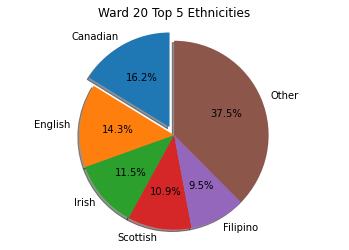

In [180]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ward20_ethnicity_pct.index
sizes = list(ward20_ethnicity_pct['% of Ward Pop'])
explode = (0.1, 0, 0, 0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Ward 20 Top 5 Ethnicities')

plt.savefig('ward20_ethnicities.png', bbox_inches='tight')

plt.show()

#### Ward 2 is characterized by a high number of Italians (15%). There are also a high number of people with ancestry from the United Kingdom (14% English, 11% Irish, and 10% Scottish). 12% identify themselves as Canadian but this ethnicity is somewhat ambiguous since anyone with Canadian citizenship is a Canadian. 

#### Ward 15 is characterized by a high number of English (19%), Scottish (15%), and Irish (14%). Chinese make up 11% of the ward's population. 15% identify themselves as Canadian

#### Ward 17 is characterized by a high number of Chinese (32.4%). Other ethnicities in the ward are East Indian (7%), Iranian (7%), and English(6%).  

#### Ward 20's largest ethnic group is Canadian (16%), English (14%), Irish (12%), Scottish (11%), and Filipino (10%). 

### Now let's look at Income in these wards...

In [181]:
# Make list of income brackets 
list(ward2018_profiles_income_df['Income Bracket'])

['Total - Total income groups in 2015 for the population aged 15 years and over in private households - 25% sample data',
 'Without total income',
 'With total income',
 'Under $10,000 (including loss)',
 '$10,000 to $19,999',
 '$20,000 to $29,999',
 '$30,000 to $39,999',
 '$40,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $69,999',
 '$70,000 to $79,999',
 '$80,000 to $89,999',
 '$90,000 to $99,999',
 '$100,000 and over',
 '$100,000 to $149,999',
 '$150,000 and over']

In [182]:
# Select only income data for columns we are interested in
ward2_15_17_20income = ward2018_profiles_income_df[['Income Bracket', 'Toronto', 'Ward 2', 'Ward 15', 'Ward 17', 'Ward 20']]
ward2_15_17_20income

,Income Bracket,Toronto,Ward 2,Ward 15,Ward 17,Ward 20
0,Total - Total income groups in 2015 for the po...,2294785,98785,82625,94405,89655
1,Without total income,107560,4110,4565,5155,5070
2,With total income,2187225,94675,78060,89255,84585
3,"Under $10,000 (including loss)",388570,13910,12720,19580,15920
4,"$10,000 to $19,999",411160,14750,11605,16730,17805
5,"$20,000 to $29,999",290580,11945,7605,11430,12130
6,"$30,000 to $39,999",221505,9280,5830,8440,9245
7,"$40,000 to $49,999",188475,8445,5365,7265,7720
8,"$50,000 to $59,999",144180,7065,4595,5425,5460
9,"$60,000 to $69,999",114915,6165,3975,4555,4300


In [183]:
# Replace the Income Bracket headings with abbreviated form so that it is easier to fit on visual plot and drop redundant rows
ward2_15_17_20income['Income Bracket'] = ward2_15_17_20income['Income Bracket'].replace(ward2_15_17_20income.loc[1, 'Income Bracket'],'No Income')
ward2_15_17_20income['Income Bracket'] = ward2_15_17_20income['Income Bracket'].replace(ward2_15_17_20income.loc[3, 'Income Bracket'],'< 10')
ward2_15_17_20income['Income Bracket'] = ward2_15_17_20income['Income Bracket'].replace(ward2_15_17_20income.loc[4, 'Income Bracket'],'10 to 19.9')
ward2_15_17_20income['Income Bracket'] = ward2_15_17_20income['Income Bracket'].replace(ward2_15_17_20income.loc[5, 'Income Bracket'],'20 to 29.9')
ward2_15_17_20income['Income Bracket'] = ward2_15_17_20income['Income Bracket'].replace(ward2_15_17_20income.loc[6, 'Income Bracket'],'30 to 39.9')
ward2_15_17_20income['Income Bracket'] = ward2_15_17_20income['Income Bracket'].replace(ward2_15_17_20income.loc[7, 'Income Bracket'],'40 to 49.9')
ward2_15_17_20income['Income Bracket'] = ward2_15_17_20income['Income Bracket'].replace(ward2_15_17_20income.loc[8, 'Income Bracket'],'50 to 59.9')
ward2_15_17_20income['Income Bracket'] = ward2_15_17_20income['Income Bracket'].replace(ward2_15_17_20income.loc[9, 'Income Bracket'],'60 to 69.9')
ward2_15_17_20income['Income Bracket'] = ward2_15_17_20income['Income Bracket'].replace(ward2_15_17_20income.loc[10, 'Income Bracket'],'70 to 79.9')
ward2_15_17_20income['Income Bracket'] = ward2_15_17_20income['Income Bracket'].replace(ward2_15_17_20income.loc[11, 'Income Bracket'],'80 to 89.9')
ward2_15_17_20income['Income Bracket'] = ward2_15_17_20income['Income Bracket'].replace(ward2_15_17_20income.loc[12, 'Income Bracket'],'90 to 99.9')
ward2_15_17_20income['Income Bracket'] = ward2_15_17_20income['Income Bracket'].replace(ward2_15_17_20income.loc[13, 'Income Bracket'],'> 100')

#Drop unnecessary rows that do not tell us income brackets
ward2_15_17_20income = ward2_15_17_20income.drop(index = [0, 2, 14, 15])

<ipython-input-183-98dd84b2926e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ward2_15_17_20income['Income Bracket'] = ward2_15_17_20income['Income Bracket'].replace(ward2_15_17_20income.loc[1, 'Income Bracket'],'No Income')
<ipython-input-183-98dd84b2926e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ward2_15_17_20income['Income Bracket'] = ward2_15_17_20income['Income Bracket'].replace(ward2_15_17_20income.loc[3, 'Income Bracket'],'< 10')
<ipython-input-183-98dd84b2926e>:4: SettingWithCopyWarning:

In [184]:
ward2_15_17_20income

,Income Bracket,Toronto,Ward 2,Ward 15,Ward 17,Ward 20
1,No Income,107560,4110,4565,5155,5070
3,< 10,388570,13910,12720,19580,15920
4,10 to 19.9,411160,14750,11605,16730,17805
5,20 to 29.9,290580,11945,7605,11430,12130
6,30 to 39.9,221505,9280,5830,8440,9245
7,40 to 49.9,188475,8445,5365,7265,7720
8,50 to 59.9,144180,7065,4595,5425,5460
9,60 to 69.9,114915,6165,3975,4555,4300
10,70 to 79.9,89780,4665,3300,3490,3090
11,80 to 89.9,69855,3800,2920,2880,2195


In [185]:
ward2_15_17_20income.columns

Index(['Income Bracket', 'Toronto', 'Ward 2', 'Ward 15', 'Ward 17', 'Ward 20'], dtype='object')

In [186]:
# Rename dataframe that has our final columns and rows
ward2_15_17_20income_scales = ward2_15_17_20income[['Income Bracket', 'Toronto', 'Ward 2', 'Ward 15', 'Ward 17', 'Ward 20']]

In [187]:
ward2_15_17_20income_scales = ward2_15_17_20income_scales.set_index('Income Bracket')

In [188]:
ward2_15_17_20income_scales

,Toronto,Ward 2,Ward 15,Ward 17,Ward 20
Income Bracket,,,,,
No Income,107560,4110,4565,5155,5070
< 10,388570,13910,12720,19580,15920
10 to 19.9,411160,14750,11605,16730,17805
20 to 29.9,290580,11945,7605,11430,12130
30 to 39.9,221505,9280,5830,8440,9245
40 to 49.9,188475,8445,5365,7265,7720
50 to 59.9,144180,7065,4595,5425,5460
60 to 69.9,114915,6165,3975,4555,4300
70 to 79.9,89780,4665,3300,3490,3090


#### Now plot the income groups to see how the wards compare

In [189]:
ward2_15_17_20income_scales = ward2_15_17_20income_scales.reset_index()

In [190]:
ward2_15_17_20income_scales

,Income Bracket,Toronto,Ward 2,Ward 15,Ward 17,Ward 20
0,No Income,107560,4110,4565,5155,5070
1,< 10,388570,13910,12720,19580,15920
2,10 to 19.9,411160,14750,11605,16730,17805
3,20 to 29.9,290580,11945,7605,11430,12130
4,30 to 39.9,221505,9280,5830,8440,9245
5,40 to 49.9,188475,8445,5365,7265,7720
6,50 to 59.9,144180,7065,4595,5425,5460
7,60 to 69.9,114915,6165,3975,4555,4300
8,70 to 79.9,89780,4665,3300,3490,3090
9,80 to 89.9,69855,3800,2920,2880,2195


Text(0, 0.5, 'CDN Dollars')

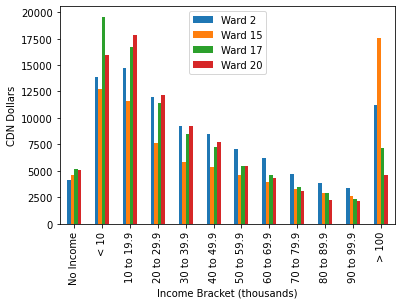

In [191]:
ward2_15_17_20income_scales.plot(x = 'Income Bracket', y = ['Ward 2', 'Ward 15', 'Ward 17', 'Ward 20'], kind = 'bar')
plt.xlabel("Income Bracket (thousands)")
plt.ylabel("CDN Dollars")

#### The bar chart seems to show that Ward 15 has a large number of wealthy people. Ward 20 seems to have a larger number of low income earners than the other 4 wards. Ward 2 is the ward with the most income earners since it has the fewest people with 'no income'. Ward 17 has the highest number of people with no income but appears to be a wealthier ward than Ward 20. 

#### It would be easier to visualize if we segment the income groups into larger chunks: 'low income', 'middle income', and 'high income'.

#### According to the Ontario government individual income below #38,500 is considered low income. Source: https://www.ontario.ca/page/low-income-workers-tax-credit

#### Also, the top 10% of income earners in Toronto earned more than $100,000 annually. This can be used as a definition of high income since the Statistics Canada looks at top 10% as an unofficial benchmark of high income earners. Source: https://www12.statcan.gc.ca/nhs-enm/2011/as-sa/99-014-x/99-014-x2011003_2-eng.cfm

In [192]:
#### Let's look at the wards with income brackets broken into 3 segments
_zero_to_39k = ward2_15_17_20income_scales.loc[0:4, 'Ward 2':'Ward 20'] #zero to 39,999 Income earners
_40k_to_99k = ward2_15_17_20income_scales.loc[5:10, 'Ward 2':'Ward 20'] #40,000 to 99,999 Income earners
_100k_and_more = ward2_15_17_20income_scales.loc[11:11, 'Ward 2':'Ward 20'] #100,000 and more Income earners

In [193]:
# Sum up the incomes for each income segment
for i in _zero_to_39k:
    _zero_to_39k.at['0 to 39.9', i] = _zero_to_39k[i].sum()

for j in _40k_to_99k:
    _40k_to_99k.at['40 to 99.9', j] = _40k_to_99k[j].sum()

for z in _100k_and_more:
    _100k_and_more.at['> 100', z] = _100k_and_more[z].sum()

In [194]:
#List the rows to drop from our _zero_to_39k dataframe
_zero_to_39k_rows = list(_zero_to_39k.index[0:5])
_zero_to_39k_rows

[0, 1, 2, 3, 4]

In [195]:
#Drop the rows that are unnecessary for segmented data
_zero_to_39k = _zero_to_39k.drop(_zero_to_39k_rows, axis = 0)

In [196]:
#Append the other segments from the other dataframes and rename our new dataframe
_zero_to_39k = _zero_to_39k.append(_40k_to_99k.loc['40 to 99.9', 'Ward 2': 'Ward 20'])
_zero_to_39k = _zero_to_39k.append(_100k_and_more.loc['> 100', 'Ward 2': 'Ward 20'])
wards_segmented_income = _zero_to_39k

In [197]:
wards_segmented_income

,Ward 2,Ward 15,Ward 17,Ward 20
0 to 39.9,53995.0,42325.0,61335.0,60170.0
40 to 99.9,33520.0,22725.0,25915.0,24880.0
> 100,11260.0,17565.0,7165.0,4615.0


In [198]:
# Reset the index
wards_segmented_income = wards_segmented_income.reset_index()

# Rename the 'index' column to 'Income Bracket' to accurately reflect the contents of the columns
wards_segmented_income = wards_segmented_income.rename(columns = {'index' : 'Income Bracket'})

wards_segmented_income.columns

Index(['Income Bracket', 'Ward 2', 'Ward 15', 'Ward 17', 'Ward 20'], dtype='object')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

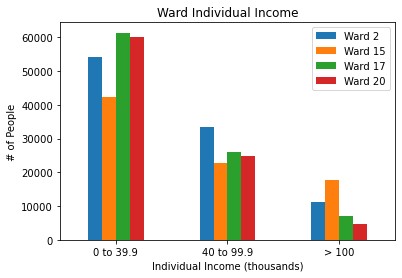

In [199]:
# Visualize the segmented income information
import matplotlib.pyplot as plt

wards_segmented_income.plot(x = 'Income Bracket', y = ['Ward 2', 'Ward 15', 'Ward 17', 'Ward 20'], kind = 'bar')
plt.xlabel("Individual Income (thousands)")
plt.ylabel("# of People")
plt.title("Ward Individual Income")

plt.savefig('ward_income_bars.png', bbox_inches='tight')

plt.xticks(rotation=360)

#### Let's also look at the percentage of the population of the ward that is belongs to each income bracket

In [200]:
wards_segmented_income_pct = wards_segmented_income

In [201]:
# Sum up each ward's number of individual income earners
ward2_total = wards_segmented_income['Ward 2'].sum()
ward15_total = wards_segmented_income['Ward 15'].sum()
ward17_total = wards_segmented_income['Ward 17'].sum()
ward20_total = wards_segmented_income['Ward 20'].sum()

# Create list of columns for pct dataframe
wards_segmented_cols = ['Ward 2', 'Ward 15', 'Ward 17', 'Ward 20']
wards_segmented_cols

['Ward 2', 'Ward 15', 'Ward 17', 'Ward 20']

In [202]:
for i in wards_segmented_income.index:
    for j in wards_segmented_cols:
        if j == 'Ward 2':
            wards_segmented_income_pct.loc[i, j] = (wards_segmented_income.loc[i, j] / ward2_total) * 100
        elif j == 'Ward 15':
            wards_segmented_income_pct.loc[i, j] = (wards_segmented_income.loc[i, j] / ward15_total) * 100
        elif j == 'Ward 17':
            wards_segmented_income_pct.loc[i, j] = (wards_segmented_income.loc[i, j] / ward17_total) * 100       
        elif j == 'Ward 20':
            wards_segmented_income_pct.loc[i, j] = (wards_segmented_income.loc[i, j] / ward20_total) * 100 


In [203]:
wards_segmented_income_pct

,Income Bracket,Ward 2,Ward 15,Ward 17,Ward 20
0,0 to 39.9,54.664642,51.231617,64.963194,67.105337
1,40 to 99.9,33.935712,27.507111,27.447969,27.747728
2,> 100,11.399646,21.261272,7.588837,5.146936


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

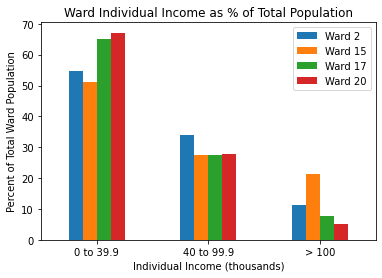

In [204]:
# Visualize the segmented income by percentage of total ward information
import matplotlib.pyplot as plt

wards_segmented_income_pct.plot(x = 'Income Bracket', y = ['Ward 2', 'Ward 15', 'Ward 17', 'Ward 20'], kind = 'bar')
plt.xlabel("Individual Income (thousands)")
plt.ylabel("Percent of Total Ward Population")

plt.title("Ward Individual Income as % of Total Population")

plt.savefig('ward_income_bars_pct.png', bbox_inches='tight')

plt.xticks(rotation=360)

#### looking at individual income for income earners as percent of total population, most conclusions of ward income are confirmed.
#### Ward 2 is mainly middle income with 55% low income 34% middle income individuals. A considerable percent are high income earners (11%).
#### Ward 15 is a wealthy neighborhood with 21% earning more than $100,000.
#### Ward 17 is mainly low income (65%) and middle income (27%). A small but notable percentage are high income earners (8%).
#### Ward 20 is mainly low income (67%) and middle income (28%). A small percentage are high income earners (5%).

### Now let's look at the population growth of the wards...

#### Check out the growth of Toronto wards

In [208]:
# Check out the columns in the dataframe
ward2018_profiles_population_df.columns

Index([      nan, 'Toronto',  'Ward 1',  'Ward 2',  'Ward 3',  'Ward 4',
        'Ward 5',  'Ward 6',  'Ward 7',  'Ward 8',  'Ward 9', 'Ward 10',
       'Ward 11', 'Ward 12', 'Ward 13', 'Ward 14', 'Ward 15', 'Ward 16',
       'Ward 17', 'Ward 18', 'Ward 19', 'Ward 20', 'Ward 21', 'Ward 22',
       'Ward 23', 'Ward 24', 'Ward 25'],
      dtype='object', name=0)

In [209]:
# List the row and column names to use in our new dataframe
rows = ['2011', '2016', 'Change', '% Change']
columns = ['Toronto',  'Ward 1',  'Ward 2',  'Ward 3',  'Ward 4',
        'Ward 5',  'Ward 6',  'Ward 7',  'Ward 8',  'Ward 9', 'Ward 10',
       'Ward 11', 'Ward 12', 'Ward 13', 'Ward 14', 'Ward 15', 'Ward 16',
       'Ward 17', 'Ward 18', 'Ward 19', 'Ward 20', 'Ward 21', 'Ward 22',
       'Ward 23', 'Ward 24', 'Ward 25']

In [210]:
# Create dataframe to show 2011 and 2016 population the change and change in %
ward_population_change = pd.DataFrame()
ward_population_change = ward_population_change.append(ward2011_profiles_population_df.loc[0:1,:])

In [211]:
ward_population_change

,NaN,Toronto,Ward 1,Ward 2,Ward 3,Ward 4,Ward 5,Ward 6,Ward 7,Ward 8,...,Ward 16,Ward 17,Ward 18,Ward 19,Ward 20,Ward 21,Ward 22,Ward 23,Ward 24,Ward 25
1,Total population by age groups,2615060,117605,114905,115435,105105,116610,100275,108200,113150,...,93005,103080,109675,107085,106730,108825,104500,101080,101910,102645


In [212]:
# Add 2018 population data
ward_population_change = ward_population_change.append(ward2018_profiles_population_df.loc[1:1,:])
ward_population_change = ward_population_change.rename(columns = {np.NaN:""})
ward_population_change = ward_population_change.reset_index(drop = True)

In [213]:
ward_population_change

,,Toronto,Ward 1,Ward 2,Ward 3,Ward 4,Ward 5,Ward 6,Ward 7,Ward 8,...,Ward 16,Ward 17,Ward 18,Ward 19,Ward 20,Ward 21,Ward 22,Ward 23,Ward 24,Ward 25
0,Total population by age groups,2615060,117605,114905,115435,105105,116610,100275,108200,113150,...,93005,103080,109675,107085,106730,108825,104500,101080,101910,102645
1,Total - Age,2731570,118040,118020,129080,108805,116685,104320,108035,114395,...,94580,110080,118800,109465,110280,112605,105540,98800,102390,102275


In [214]:
# Set columns for the dataframe that will have Ward population change
cols = list(ward_population_change)
cols = ['Toronto', 'Ward 1', 'Ward 2', 'Ward 3', 'Ward 4', 'Ward 5', 'Ward 6', 'Ward 7', 'Ward 8', 'Ward 9', 'Ward 10', 'Ward 11', 'Ward 12', 'Ward 13',
        'Ward 14', 'Ward 15', 'Ward 16', 'Ward 17', 'Ward 18', 'Ward 19', 'Ward 20', 'Ward 21', 'Ward 22', 'Ward 23', 'Ward 24', 'Ward 25']

In [215]:
# List the change in population for each ward
ward_change = []
for i in cols:
    ward_change.append(ward_population_change.loc[1,i] - ward_population_change.loc[0,i])

In [216]:
# Make the dataframe for ward population change
ward_change = pd.DataFrame(ward_change).T

In [217]:
# Set the column names 
ward_change.columns = cols

In [218]:
# Rename index
ward_change = ward_change.rename(index = {0:'Pop Change'})

In [219]:
ward_change = ward_change.reset_index()
ward_change = ward_change.rename(columns = {'index' : ''})

In [220]:
ward_change

,,Toronto,Ward 1,Ward 2,Ward 3,Ward 4,Ward 5,Ward 6,Ward 7,Ward 8,...,Ward 16,Ward 17,Ward 18,Ward 19,Ward 20,Ward 21,Ward 22,Ward 23,Ward 24,Ward 25
0,Pop Change,116510,435,3115,13645,3700,75,4045,-165,1245,...,1575,7000,9125,2380,3550,3780,1040,-2280,480,-370


In [221]:
# Append ward pop change to ward population dataframe
ward_population_change = ward_population_change.append(ward_change)
ward_population_change.reset_index(drop=True)

,,Toronto,Ward 1,Ward 2,Ward 3,Ward 4,Ward 5,Ward 6,Ward 7,Ward 8,...,Ward 16,Ward 17,Ward 18,Ward 19,Ward 20,Ward 21,Ward 22,Ward 23,Ward 24,Ward 25
0,Total population by age groups,2615060,117605,114905,115435,105105,116610,100275,108200,113150,...,93005,103080,109675,107085,106730,108825,104500,101080,101910,102645
1,Total - Age,2731570,118040,118020,129080,108805,116685,104320,108035,114395,...,94580,110080,118800,109465,110280,112605,105540,98800,102390,102275
2,Pop Change,116510,435,3115,13645,3700,75,4045,-165,1245,...,1575,7000,9125,2380,3550,3780,1040,-2280,480,-370


In [222]:
# Create more meaningful row names
ward_population_change = ward_population_change.replace('Total population by age groups', '2011')
ward_population_change = ward_population_change.replace('Total - Age', '2016')

In [223]:
ward_population_change = ward_population_change.reset_index(drop = True)

In [224]:
ward_population_change

,,Toronto,Ward 1,Ward 2,Ward 3,Ward 4,Ward 5,Ward 6,Ward 7,Ward 8,...,Ward 16,Ward 17,Ward 18,Ward 19,Ward 20,Ward 21,Ward 22,Ward 23,Ward 24,Ward 25
0,2011,2615060,117605,114905,115435,105105,116610,100275,108200,113150,...,93005,103080,109675,107085,106730,108825,104500,101080,101910,102645
1,2016,2731570,118040,118020,129080,108805,116685,104320,108035,114395,...,94580,110080,118800,109465,110280,112605,105540,98800,102390,102275
2,Pop Change,116510,435,3115,13645,3700,75,4045,-165,1245,...,1575,7000,9125,2380,3550,3780,1040,-2280,480,-370


In [225]:
ward_population_change.columns
cols = ['Toronto', 'Ward 1', 'Ward 2', 'Ward 3', 'Ward 4', 'Ward 5',
       'Ward 6', 'Ward 7', 'Ward 8', 'Ward 9', 'Ward 10', 'Ward 11', 'Ward 12',
       'Ward 13', 'Ward 14', 'Ward 15', 'Ward 16', 'Ward 17', 'Ward 18',
        'Ward 19', 'Ward 20', 'Ward 21', 'Ward 22', 'Ward 23', 'Ward 24',
        'Ward 25']

In [226]:
# Calculate % change of ward population change
for i in cols:
    ward_population_change.loc[3,i] = (ward_population_change.loc[2,i] / ward_population_change.loc[0,i])*100


In [227]:
# Create more meaningful row name
ward_population_change = ward_population_change.replace(np.NaN, '% Pop Change')

In [228]:
ward_population_change = ward_population_change.set_index('')

In [229]:
# Round values to 2 decimals
ward_population_change = ward_population_change.round(2)

In [232]:
pd.set_option('display.max_columns', None)
ward_population_change

,Toronto,Ward 1,Ward 2,Ward 3,Ward 4,Ward 5,Ward 6,Ward 7,Ward 8,Ward 9,Ward 10,Ward 11,Ward 12,Ward 13,Ward 14,Ward 15,Ward 16,Ward 17,Ward 18,Ward 19,Ward 20,Ward 21,Ward 22,Ward 23,Ward 24,Ward 25
,,,,,,,,,,,,,,,,,,,,,,,,,,
2011,2615060.00,117605.00,114905.00,115435.00,105105.00,116610.00,100275.00,108200.00,113150.0,102360.00,82475.00,98605.00,103985.00,93970.00,104020.00,99820.00,93005.00,103080.00,109675.00,107085.00,106730.00,108825.00,104500.0,101080.00,101910.00,102645.00
2016,2731570.00,118040.00,118020.00,129080.00,108805.00,116685.00,104320.00,108035.00,114395.0,108470.00,115510.00,104310.00,107900.00,103805.00,106875.00,102510.00,94580.00,110080.00,118800.00,109465.00,110280.00,112605.00,105540.0,98800.00,102390.00,102275.00
Pop Change,116510.00,435.00,3115.00,13645.00,3700.00,75.00,4045.00,-165.00,1245.0,6110.00,33035.00,5705.00,3915.00,9835.00,2855.00,2690.00,1575.00,7000.00,9125.00,2380.00,3550.00,3780.00,1040.0,-2280.00,480.00,-370.00
% Pop Change,4.46,0.37,2.71,11.82,3.52,0.06,4.03,-0.15,1.1,5.97,40.05,5.79,3.76,10.47,2.74,2.69,1.69,6.79,8.32,2.22,3.33,3.47,1.0,-2.26,0.47,-0.36


#### Looking at growth from 2011 to 2016,  
#### City of Toronto grew 4.46%
#### Ward 2 grew 2.71% 
#### Ward 15 grew 2.69%
#### Ward 17 grew 6.79%
#### Ward 20 grew 3.33%

In [233]:
ward_population_change.columns

Index(['Toronto', 'Ward 1', 'Ward 2', 'Ward 3', 'Ward 4', 'Ward 5', 'Ward 6',
       'Ward 7', 'Ward 8', 'Ward 9', 'Ward 10', 'Ward 11', 'Ward 12',
       'Ward 13', 'Ward 14', 'Ward 15', 'Ward 16', 'Ward 17', 'Ward 18',
       'Ward 19', 'Ward 20', 'Ward 21', 'Ward 22', 'Ward 23', 'Ward 24',
       'Ward 25'],
      dtype='object', name=0)

In [234]:
ward_transposed = ward_population_change.T

In [235]:
ward_transposed = ward_transposed.reset_index()

Text(0, 0.5, '% Growth of Population')

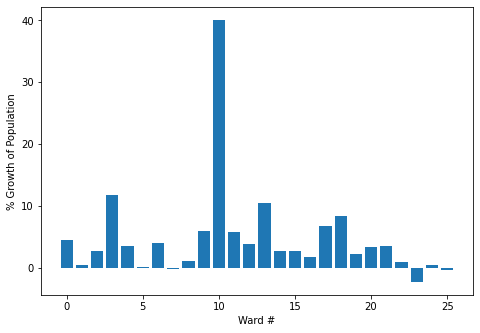

In [236]:
# Visualize the population growth of each ward in a bar plot
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ward = list(ward_transposed.index)
growth = list(ward_transposed['% Pop Change'])
ax.bar(ward, growth)
plt.show    

plt.xlabel("Ward #")
plt.ylabel("% Growth of Population")

#### As seen in the bar plot, Ward 10 is the ward with the highest growth among the 25 wards in Toronto. Ward 10 has shown the most growth but we chose to rule it out before due to the oversaturation of the ward (too few customers per restaurant).

#### Let's look only at our candidate wards (Ward 2, 15, 17, 20)

In [237]:
# Create dataframe of population growth with only our candidate wards
ward_population_change_candidates = ward_population_change[['Ward 2', 'Ward 15', 'Ward 17', 'Ward 20']]

In [238]:
ward_population_change_candidates

,Ward 2,Ward 15,Ward 17,Ward 20
,,,,
2011,114905.00,99820.00,103080.00,106730.00
2016,118020.00,102510.00,110080.00,110280.00
Pop Change,3115.00,2690.00,7000.00,3550.00
% Pop Change,2.71,2.69,6.79,3.33


In [239]:
# Transpose and reset for plotting to bar plot
ward_population_change_candidates_transposed = ward_population_change_candidates.T

In [240]:
ward_population_change_candidates_transposed

,2011,2016,Pop Change,% Pop Change
0,,,,
Ward 2,114905.0,118020.0,3115.0,2.71
Ward 15,99820.0,102510.0,2690.0,2.69
Ward 17,103080.0,110080.0,7000.0,6.79
Ward 20,106730.0,110280.0,3550.0,3.33


<function matplotlib.pyplot.show(*args, **kw)>

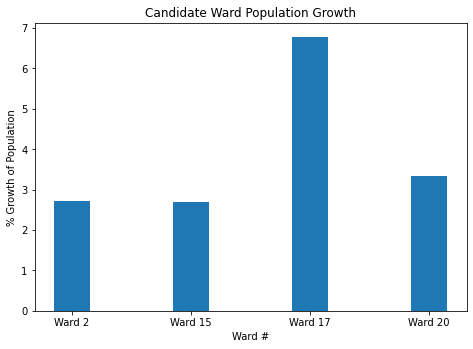

In [241]:
# Visualize the population growth of candidate wards in a bar plot
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ward = list(ward_population_change_candidates_transposed.index)
growth = list(ward_population_change_candidates_transposed['% Pop Change'])
ax.bar(ward, growth, width = 0.3)

plt.title("Candidate Ward Population Growth")
plt.xlabel("Ward #")
plt.ylabel("% Growth of Population")

plt.savefig('ward_pop_growth_pct.png', bbox_inches='tight')

plt.show

#### Among candidate wards, Ward 17 shows the highest growth from 2011 to 2016 with 6.79% growth in population which is more than twice the 2nd highest growth rate of 3.33% growth of Ward 20. 
#### In fact Ward 17 showed the 5th highest growth rate from 2011 to 2016. 


## Foursquare API Venue Search

In [242]:
# Import file with data with ward latitude, longitude, area and radius
path = # Hidden info by user
ward_map = pd.read_csv(path)

In [243]:
ward_map = ward_map.drop(columns = ['Unnamed: 0'])

In [244]:
ward_map

,Ward #,Ward,Latitude,Longitude,Area (sq km),Radius (km)
0,1,Etobicoke North,43.725429,-79.578757,48.38,3.924262
1,2,Etobicoke Centre,43.664601,-79.550374,37.36,3.448486
2,3,Etobicoke-Lakeshore,43.622806,-79.519140,40.03,3.569586
3,4,Parkdale-High Park,43.650001,-79.463845,15.33,2.209002
4,5,York South-Weston,43.695530,-79.489915,24.98,2.819819
5,6,York Centre,43.750962,-79.463553,35.37,3.355387
6,7,Humber River-Black Creek,43.747199,-79.528890,30.71,3.126547
7,8,Eglinton-Lawrence,43.719360,-79.429685,22.67,2.686277
8,9,Davenport,43.667810,-79.443582,12.10,1.962537
9,10,Spadina-Fort York,43.643116,-79.408300,18.71,2.440405


In [251]:
# List rows in dataframe
ward_map_drop_rows = list(ward_map.index)
ward_map_drop_rows = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17,  18, 20, 21, 22, 23, 24]

In [252]:
# Include only the wards that are candidate wards in the dataframe
ward_map_candidates = ward_map.drop(index = ward_map_drop_rows)
ward_map_candidates = ward_map_candidates.reset_index(drop = True)

In [253]:
ward_map_candidates

,Ward #,Ward,Latitude,Longitude,Area (sq km),Radius (km)
0,2,Etobicoke Centre,43.664601,-79.550374,37.36,3.448486
1,15,Don Valley West,43.730530,-79.375921,30.30,3.105606
2,17,Don Valley North,43.789172,-79.357859,24.43,2.788604
3,20,Scarborough Southwest,43.714206,-79.256889,28.20,2.996054


#### Do Foursquare API search of Wards 2, 15, 17, 20 to examine most common venues in each ward and most common restaurants.

In [254]:
from getpass import getpass
#Ask for Client ID, Client Secret, and Access Token from user
CLIENT_ID = getpass("Enter Foursquare Client ID#:") # your Foursquare ID
CLIENT_SECRET = getpass("Enter Foursquare Secret:")  # your Foursquare Secret
ACCESS_TOKEN = getpass("Enter Foursquare Access Token:") # your FourSquare Access Token

Enter Foursquare Client ID#: ················································
Enter Foursquare Secret: ················································
Enter Foursquare Access Token: ················································


In [255]:
#Define Foursquare VERSION 
VERSION = '20180604'
#LIMIT = 100 #Default Foursquare API limit value

In [257]:
#Get the top 100 venues in the neighbourhood in from the first row of toronto_data dataframe
#Create GET request url and name the url
radius = (ward_map_candidates.loc[0, 'Radius (km)']) * 1000
LIMIT = 100 #Foursquare default API limit vaue

### Create GET request URL

### Explore candidate wards

In [275]:
# Explore the neighbourhoods in Toronto
#Create function to return the names of neighbourhoods 
def getNearbyVenues(names, latitudes, longitudes, radius):
    venues_list = []
    for name, lat, lng, radius in zip(names, latitudes, longitudes, radius):
        print(name)
        
        #API request url
        url = url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng, 
            ACCESS_TOKEN, 
            VERSION, 
            radius, 
            LIMIT)
        
        
        #Make GET request
        results = requests.get(url).json()["response"]["groups"][0]['items']
        
        #Return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Ward #',
                         'Ward Latitude',
                         'Ward Longitude',
                         'Venue',
                         'Venue Latitude',
                         'Venue Longitude',
                         'Venue Category']
    return (nearby_venues)            

In [276]:
#Create a new dataframe called ward_candidate_venues
ward_map_candidate_venues = getNearbyVenues(names=ward_map_candidates['Ward #'], latitudes=ward_map_candidates['Latitude'], 
                                            longitudes = ward_map_candidates['Longitude'], radius = (ward_map_candidates['Radius (km)'] * 1000))

2
15
17
20


In [277]:
#Check the size of the toronto_venues dataframe
print(ward_map_candidate_venues.shape)
ward_map_candidate_venues.head()

(400, 7)


,Ward #,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,2,43.664601,-79.550374,Java Joe's Village Cafe,43.662461,-79.532054,Café
1,2,43.664601,-79.550374,St Georges Golf and Country Club,43.674395,-79.537142,Golf Course
2,2,43.664601,-79.550374,Mrakovic,43.666641,-79.578850,Eastern European Restaurant
3,2,43.664601,-79.550374,West Deane Park,43.662357,-79.558618,Park
4,2,43.664601,-79.550374,MAI Bistro - Asian-Latin Tapas,43.649200,-79.528490,Tapas Restaurant


In [278]:
#Check how many venues were returned for each neighbourhood
ward_map_candidate_venues.groupby('Ward #').count() #Limit of 100 venues 

,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Ward #,,,,,,
2,100,100,100,100,100,100
15,100,100,100,100,100,100
17,100,100,100,100,100,100
20,100,100,100,100,100,100


In [279]:
#Check how many unique categories can be curated from all the returned venues
print('There are {} unique categories'.format(len(ward_map_candidate_venues['Venue Category'].unique())))

There are 110 unique categories


### Analyze Each Neighbourhood

In [280]:
#Apply One Hot Encoding to 'Venue Category' column
toronto_onehot = pd.get_dummies(ward_map_candidate_venues[['Venue Category']], prefix = "", prefix_sep = "")

#Add neighbourhood column back to dataframe
toronto_onehot['Ward #'] = ward_map_candidate_venues['Ward #']

#Move neighbourhood column to the first column for easier referencing
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print("Size of toronto_onehot dataframe is {}".format(toronto_onehot.shape))
toronto_onehot.head()

Size of toronto_onehot dataframe is (400, 111)


,Ward #,American Restaurant,Arts & Crafts Store,Asian Restaurant,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Beach,Beer Store,Bike Shop,Bistro,Botanical Garden,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Café,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,College Rec Center,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,General Entertainment,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Laser Tag,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Music Store,New American Restaurant,Nightclub,Other Great Outdoors,Outdoor Supply Store,Paper / Office Supplies Store,Park,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shopping Mall,Smoothie Shop,Sporting Goods Shop,Sports Bar,Stables,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [281]:
#Group rows by neighbourhood and calculate the mean of the frequency of occurence of each category
toronto_grouped = toronto_onehot.groupby('Ward #').mean().reset_index()
print("The dataframe size containing the mean of the frequency of each category occurence is {}".format(toronto_grouped.shape))
toronto_grouped

The dataframe size containing the mean of the frequency of each category occurence is (4, 111)


,Ward #,American Restaurant,Arts & Crafts Store,Asian Restaurant,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Beach,Beer Store,Bike Shop,Bistro,Botanical Garden,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Café,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,College Rec Center,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,General Entertainment,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Laser Tag,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Music Store,New American Restaurant,Nightclub,Other Great Outdoors,Outdoor Supply Store,Paper / Office Supplies Store,Park,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shopping Mall,Smoothie Shop,Sporting Goods Shop,Sports Bar,Stables,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,2,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.07,0.00,0.03,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.12,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.02,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.05,0.01,0.01,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.01,0.00,0.03,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.07,0.03,0.01,0.02,0.00,0.03,0.00,0.06,0.01,0.01,0.01,0.00,0.00,0.01,0.03,0.00,0.00,0.01,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.01,0.01,0.00
1,15,0.00,0.00,0.02,0.01,0.02,0.01,0.05,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.02,0.00,0.05,0.01,0.01,0.00,0.01,0.00,0.06,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.03,0.01,0.01,0.01,0.00,0.04,0.01,0.06,0.02,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.01,0.00,0.01,0.01,0.00,0.03,0.01,0.01,0.02,0.04,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.02
2,17,0.01,0.00,0.00,0.00,0.00,0.00,0.06,0.06,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.01,0.01,0.00,0.00,0.01,0.02,0.06,0.01,0.02,0.10,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.02,0.00,0.01,0.00,0.01,0.00,0.02,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.02,0.02,0.00,0.01,0.00,0.03,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.01,0.00,0.03,0.03,0.00,0.00,0.00,0.02,0.01,0.06,0.02,0.00,0.01,0.00,0.00,0.00,0.02,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,20,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.03,0.02,0.02,0.00,0.01,0.00,0.02,0.00,0.00,0.03,0.02,0.01,0.00,0.00,0.04,0.00,0.00,0.09,0.00,0.00,0.00,0.01,0.02,0.01,0.01,0.03,0.00,0.00,0.00,0.00,0.04,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.02,0.04,0.02,0.00,0.00,0.00,0.04,0.00,0.00,0.02,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.00,0.01,0.04,0.05,0.00,0.03,0.00,0.02,0.00,0.07,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.00


In [282]:
#Print the top 10 most common venues in each neighbourhood
num_top_venues = 10

for hood in toronto_grouped['Ward #']:
    print("---Ward {}---".format(hood))
    temp = toronto_grouped[toronto_grouped['Ward #'] == hood].T.reset_index()
    temp.columns = ['venue','freq %']
    temp = temp.iloc[1:]
    temp['freq %'] = ((temp['freq %']).astype(float)) * 100
    temp = temp.round({'freq %':2})
    print(temp.sort_values('freq %', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    

---Ward 2---
              venue  freq %
0       Coffee Shop    12.0
1          Pharmacy     7.0
2              Bank     7.0
3    Sandwich Place     6.0
4     Grocery Store     5.0
5        Restaurant     3.0
6            Bakery     3.0
7        Beer Store     3.0
8      Liquor Store     3.0
9  Sushi Restaurant     3.0


---Ward 15---
                 venue  freq %
0          Coffee Shop     6.0
1   Italian Restaurant     6.0
2               Bakery     5.0
3                 Café     5.0
4     Sushi Restaurant     4.0
5       Ice Cream Shop     4.0
6                 Park     3.0
7        Grocery Store     3.0
8  Sporting Goods Shop     3.0
9          Yoga Studio     2.0


---Ward 17---
                       venue  freq %
0                Coffee Shop    10.0
1             Sandwich Place     6.0
2                     Bakery     6.0
3                       Bank     6.0
4         Chinese Restaurant     6.0
5                   Pharmacy     3.0
6                Pizza Place     3.0
7  Middle 

### Put "most common venues" into dataframe

In [283]:
#Sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [284]:
#Create new dataframe and display top 10 venues for each neighbourhood
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

In [285]:
#Create columns to indicate top venues from 1st to 10th most common
columns = ['Ward #']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [286]:
#Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Ward #'] = toronto_grouped['Ward #']

for ind in np.arange(toronto_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind,:], num_top_venues)

neighbourhoods_venues_sorted.head()

,Ward #,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Coffee Shop,Pharmacy,Bank,Sandwich Place,Grocery Store,Liquor Store,Sushi Restaurant,Bakery,Pizza Place,Restaurant
1,15,Italian Restaurant,Coffee Shop,Café,Bakery,Ice Cream Shop,Sushi Restaurant,Sporting Goods Shop,Park,Grocery Store,Japanese Restaurant
2,17,Coffee Shop,Bank,Chinese Restaurant,Bakery,Sandwich Place,Pharmacy,Pizza Place,Japanese Restaurant,Middle Eastern Restaurant,Shopping Mall
3,20,Coffee Shop,Sandwich Place,Pizza Place,Ice Cream Shop,Fast Food Restaurant,Pharmacy,Grocery Store,Chinese Restaurant,Park,Discount Store


### Plot the Candidate Wards on the map of Toronto

In [287]:
import geocoder 

#Import map rendering library
import folium

In [288]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [289]:
#Get the geographical coordinates of Toronto
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent = "toronto_explorer") #Name the user_agent toronto_explorer
location = geolocator.geocode(address)
tor_latitude = location.latitude
tor_longitude = location.longitude
print('The geographical coordinates of {} are {}, {}.'.format(address, tor_latitude, tor_longitude))

The geographical coordinates of Toronto, Ontario are 43.6534817, -79.3839347.


In [290]:
#Import map rendering library
import folium
from folium.features import DivIcon

In [291]:
#First create a map of Toronto using latitude and longitude values 
map_toronto = folium.Map(location=[tor_latitude, tor_longitude], zoom_start=10)

In [293]:
#Add markers to mark the candidate wards defined by ward # and ward name. Plot the circles to approximate the area of ward as circular wards.
for lat, lng, wardnum, ward, radius in zip(ward_map_candidates['Latitude'], ward_map_candidates['Longitude'], ward_map_candidates['Ward #'], ward_map_candidates['Ward'], ward_map_candidates['Radius (km)']):
    label = 'Ward {}, {}'.format(wardnum, ward)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius = radius*1000,        
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity = 0.7,
        parse_html=False).add_to(map_toronto)
    
    text = 'Ward {}, {}'.format(wardnum, ward)
    folium.map.Marker(
        [lat+0.012, lng-0.012],
        icon=DivIcon(
            icon_size=(50,6),
            icon_anchor=(0,0),
            html=text       #'<div style="font-size: 20pt">label</div>',
            )
        ).add_to(map_toronto)
    


In [294]:
map_toronto

## Results and Discussion <a name="results"></a>

Ward 15 can be summarized as a ward with many high-income individuals with United Kingdom ethnicity. Furthermore, high-priced ethnic cuisine such as Italian and Japanese cuisine would do well as evidenced from the commonality of these restaurants among venues. If the investor reading this report has access to chefs who can prepare high-end Italian or Japanese food, Ward 15 would be ideal to set up a high-priced restaurant specializing in Italian or Japanese food. Other ethnic foods with a reputation for high-price are French, American, and Continental. One seeking to set up a restaurant in Ward 15 could also consider these types of cuisine even though this project did not find that there were many French, American or Continental restaurants in the ward.

Ward 17 is a ward with a mainly low to middle income population. There are a little more than 7,000 individuals earning more than $100,000 which is less than half the number in Ward 15. The predominant ethnic group is by far Chinese with almost 33% of the total population so a mid-priced Chinese restaurant should do well as evidenced by the commonality of Chinese restaurants within in the ward. Also, the ward is likely not yet saturated with Chinese restaurants since there are 442 Customers per Restaurant in the ward which is the 3rd highest number of customers per restaurant ratio among all 25 Toronto wards. Furthermore, Ward 17 has the highest population density and the highest growth rate among our 4 candidate wards so it probably offers the best opportunity for people who have access to chefs who can cook Chinese food.

Ward 2 and Ward 20 also offer some favorable characteristics and were originally included in the candidate wards list but the most common restaurants returned which were ‘sandwich place’, ‘pizza place’ and ‘fast food’ are not specific enough to come up with as strong a recommendation as could be done for Ward 15 and Ward 17. 


## Conclusion <a name="conclusion"></a>

Choosing the ideal location for a new restaurant is not very simple. The most attractive locations tend to be ones with high population density, a population with high disposable income, and population growth. However, the most attractive locations also attract the most competitors. As a result. the goal of this study was to find attractive locations that have not yet been saturated by over-competition. Sometimes the ideal location may seem counter-intuitive as was the case in this project’s analysis which found that the two best locations for a new restaurant were in wards with medium density and away from the city’s downtown core. 

## Next Steps
Despite this project’s analysis, this project does not consider commercial rental prices in the wards mentioned and the cost of labor. Also, this project has not looked into specific intersections or neighborhoods within the ideal wards where a restaurant would do well. As well, high-level research should be complemented by field research by physically visiting the neighborhoods and visiting some of the existing businesses and talking to the locals who live in the area. This deeper level of analysis is beyond the scope of the project and should be undertaken within a business plan before making an investment decision. However, the information learned from this project’s analysis should help an investor start his or her journey to becoming a successful restauranteur in Toronto. 